# First and foremost, create the environment.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import datetime
import matplotlib.pyplot as plt
import itertools
import warnings 
from tqdm import tnrange, tqdm_notebook
import seaborn as sns
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler

import datetime
from sklearn.pipeline import Pipeline, make_pipeline


lr=LinearRegression()

#import warnings filter
from warnings import simplefilter
# Prevent warnings from appearing
warnings.filterwarnings('ignore')

In [2]:
# parameters = {
#     "n_neighbors":[1,3,5,7,9,15,21],
#     "weights":["",""],
#     "algorithm":["","",""],
#     "leaf_size":[25,30,35],
#     "p":[1,2]
# }
# gs = GridSearchCV(knn, param_grid=parameters)
# model = gs.fit(X_train,y_train)
# preds = model.predict(X_test)
# accuracy_score(y_test, preds)

In [3]:
# # Check that all the PIDs and Ids are unique

# def check_ID(df):
#     # Unique PIDs
#     n_rows = df.shape[0]
#     n_pids = len(df['PID'].unique())
#     if n_pids != n_rows:
#         print("# PIDs {} but {} rows.".format(n_pids, n_rows))

#     # Unique IDs
#     n_ids = len(df['Id'].unique())
#     if n_ids != n_rows:
#         print("# Ids {} but {} rows.".format(n_ids, n_rows))

#     return

In [4]:
# # Check non-numeric columns with missing values and what possible
# # values are for each object column

# def check_nonnumcolumns(df):
#     check_columns = df.select_dtypes([np.object]).columns
#     for col in check_columns:
# #        print("Values of {} are {}.".format(col,df[col].unique()))
#         n_nan = df[col].isnull().sum()
#         if n_nan > 0:
#             print("{} has {} NaNs".format(col,n_nan))
#     return

In [5]:
# # Check numeric columns with missing values 

# def check_numcolumns(df):
#     s = df.shape
#     print("Rows: {} Cols: {}".format(s[0],s[1]))
    
#     # check for null values
#     null_null = df.isnull().sum()
#     null_count = sum(df.isnull().sum())
#     if null_count > 0:
#         print("There is {} of null data.".format(null_count))
#         print("Columns with NaN: {}".format(list(null_null[null_null > 0].index)))
        
#         check_nonnumcolumns(df)
        
#         return

In [6]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles):
#     nrows = int(np.ceil(len(list_of_columns)/4))
#     a = int(np.ceil(len(list_of_columns)/4))*8.5
#     fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a))
#     ax = ax.ravel()
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         ax[i].set_title(list_of_titles[i], fontsize=30)
#         ax[i].set_ylabel('Frequency')
#         ax[i].axhline(y=dataframe.shape[0]*0.7, color='r')

In [7]:
# # impute NaNs.
# # Change NaNs in numeric columns to a value 0

# def clean_nan(df,val):
#     non_numeric_columns = df.select_dtypes([np.object]).columns
#     df[non_numeric_columns] = df[non_numeric_columns].fillna(val)
    
#     return

In [8]:
# train_updated['Lot Frontage'] = train_updated.groupby(['MS SubClass','Lot Shape'])['Lot Frontage'].transform( lambda x: x.fillna(x.median()))

# Tackling the administrative stuff..

**Read in CSVs**

In [9]:
train = pd.read_csv('./datasets/train.csv')

In [10]:
test = pd.read_csv('./datasets/test.csv')

In [11]:
# informational 
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [12]:
# preview of the train dataset
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

**Set ID as Index**

In [13]:
train.set_index('Id', inplace=True)

In [14]:
# preview again
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                           
109  533352170           60        RL           NaN     13517   Pave   NaN   
544  531379050           60        RL          43.0     11492   Pave   NaN   
153  535304180           20        RL          68.0      7922   Pave   NaN   
318  916386060           60        RL          73.0      9802   Pave   NaN   
255  906425045           50        RL          82.0     14235   Pave   NaN   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                   
109        TA        TA            No            GLQ         533.0   
544        Gd        TA            No            GLQ         637.0   
153        TA        TA            No            GLQ         731.0   
318        Gd        TA            No            Unf           0.0   
255        Fa        Gd            No            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318 

In [15]:
# look at the names of all the columns
train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [16]:
# looking for errors 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [17]:
train.describe()

PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.051000e+03  2051.000000   1721.000000    2051.000000   2051.000000   
mean   7.135900e+08    57.008776     69.055200   10065.208191      6.112140   
std    1.886918e+08    42.824223     23.260653    6742.488909      1.426271   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284581e+08    20.000000     58.000000    7500.000000      5.000000   
50%    5.354532e+08    50.000000     68.000000    9430.000000      6.000000   
75%    9.071801e+08    70.000000     80.000000   11513.500000      7.000000   
max    9.241520e+08   190.000000    313.000000  159000.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2051.000000  2051.000000     2051.000000   2029.000000   2050.000000   
mean       5.562165  1971.708922     1984.190151     99.695909    442.300488   
std        1.104497    30.177889       21.036250    174.963129    461.204124   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1953.500000     1964.500000      0.000000      0.000000   
50%        5.000000  1974.000000     1993.000000      0.000000    368.000000   
75%        6.000000  2001.000000     2004.000000    161.000000    733.750000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  \
count   2050.000000  2050.000000    2050.000000  2051.000000  2051.000000   
mean      47.959024   567.728293    1057.987805  1164.488055   329.329108   
std      165.000901   444.954786     449.410704   396.446923   425.671046   
min        0.000000     0.000000       0.000000   334.000000     0.000000   
25%        0.000000   220.000000     793.000000   879.500000     0.000000   
50%        0.000000   474.500000     994.500000  1093.000000     0.000000   
75%        0.000000   811.000000    1318.750000  1405.000000   692.500000   
max     1474.000000  2336.000000    6110.000000  5095.000000  1862.000000   

       Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
count      2051.000000  2051.000000     2049.000000     2049.000000   
mean          5.512921  1499.330083        0.427526        0.063446   
std          51.068870   500.447829        0.522673        0.251705   
min           0.000000   334.000000        0.000000        0.000000   
25%           0.000000  1129.000000        0.000000        0.000000   
50%           0.000000  1444.000000        0.000000        0.000000   
75%           0.000000  1728.500000        1.000000        0.000000   
max        1064.000000  5642.000000        3.000000        2.000000   

         Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
count  2051.000000  2051.000000    2051.000000    2051.000000    2051.000000   
mean      1.577279     0.371039       2.843491       1.042906       6.435885   
std       0.549279     0.501043       0.826618       0.209790       1.560225   
min       0.000000     0.000000       0.000000       0.000000       2.000000   
25%       1.000000     0.000000       2.000000       1.000000       5.000000   
50%       2.000000     0.000000       3.000000       1.000000       6.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.000000   
max       4.000000     2.000000       8.000000       3.000000      15.000000   

        Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
count  2051.000000    1937.000000  2050.000000  2050.000000   2051.000000   
mean      0.590931    1978.707796     1.776585   473.671707     93.833740   
std       0.638516      25.441094     0.764537   215.934561    128.549416   
min       0.000000    1895.000000     0.000000     0.000000      0.000000   
25%       0.000000    1961.000000     1.000000   319.000000      0.000000   
50%       1.000000    1980.000000     2.000000   480.000000      0

In [18]:
train.shape

(2051, 80)

'Id', 'PID' and 'SalePrice' are not features
'Id' and 'PID' are property ID numbers that has no relationship/ effect with 'SalePrice'
Considering the target variable is 'SalePrice', it will be removed from X before train_test_split.split

# Inspect and proceed with Data Cleaning..

Columns with null might be referred as ie: "na" or "none.  A feature might actually be better represented by "0" or "na" rather than NULL or NaN. There's a difference between NULL (unknown value as it is not a number), and "NA" (not available). 

For example, in 'Garage Type', there is a distinct different between 'There is no garage' or 'There is no data available'.

In [19]:
# identify columns with Null values 
train.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Qual         114
Garage Finish       114
Garage Cond         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
Bsmt Cond            55
Bsmt Qual            55
BsmtFin Type 1       55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Year Built            0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
SalePrice             0
Condition 1           0
Overall Cond          0
Utilities             0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape             0
Land Contour    

Data description for proper value representation!

Nulls for respective columns will be filled by imputation.

Using domain knowledge to select an appropriate value.

In [20]:
# data dictionary of ordinal categorical data
lot_shape_dict = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}
train['Lot Shape'] = train['Lot Shape'].map(lot_shape_dict)
utilities_dict = {'AllPub':4,'NoSewr':3, 'NoSeWa':2, 'ELO':1}
train['Utilities'] = train['Utilities'].map(utilities_dict)
land_slope_dict = {'Gtl':3, 'Mod':2, 'Sev':1}
train['Land Slope'] = train['Land Slope'].map(land_slope_dict)
exter_qual_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
train['Exter Qual'] = train['Exter Qual'].map(exter_qual_dict)
exter_cond_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
train['Exter Cond'] = train['Exter Cond'].map(exter_cond_dict)
bsmt_qual_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
train['Bsmt Qual'] = train['Bsmt Qual'].map(bsmt_qual_dict)
bsmt_cond_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
train['Bsmt Cond'] = train['Bsmt Cond'].map(bsmt_qual_dict)
bsmt_expo_dict = {'Gd':5, 'Av':4,'Mn':3,'No':2, 'NA':1}
train['Bsmt Exposure'] = train['Bsmt Exposure'].map(bsmt_expo_dict)
bsmt_fin1_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1}
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(bsmt_fin1_dict)
bsmt_fin2_dict = {'GLQ':7, 'ALQ':6, 'BLQ':5,'Rec':4, 'LwQ':3, 'Unf':2, 'NA':1}
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(bsmt_fin2_dict)
heatingqc_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
train['Heating QC'] = train['Heating QC'].map(heatingqc_dict)
electrical_dict = {'SBrkr':5, 'FuseA':4, 'FuseF':3,'FuseP':2, 'Mix':1}
train['Electrical'] = train['Electrical'].map(electrical_dict)
kitchenqual_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
train['Kitchen Qual'] = train['Kitchen Qual'].map(kitchenqual_dict)
functional_dict = {'Typ':8, 'Min1':7, 'Min2':6,'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
train['Functional'] = train['Functional'].map(functional_dict)
fireplacequ_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
train['Fireplace Qu'] = train['Fireplace Qu'].map(fireplacequ_dict)
garage_fin_dict = {'Fin':4, 'RFn':3, 'Unf':2, 'NA':1}
train['Garage Finish'] = train['Garage Finish'].map(garage_fin_dict)
garage_qual_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
train['Garage Qual'] = train['Garage Qual'].map(garage_qual_dict)
garage_cond_dict = {'Ex':6, 'Gd':5, 'TA':4,'Fa':3, 'Po':2, 'NA':1}
train['Garage Cond'] = train['Garage Cond'].map(garage_cond_dict)
paved_drive_dict = {'Y':3, 'P':2,'N':1}
train['Paved Drive'] = train['Paved Drive'].map(paved_drive_dict)
poolqc_dict = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1}
train['Pool QC'] = train['Pool QC'].map(poolqc_dict)
fence_dict = {'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'NA':1}
train['Fence'] = train['Fence'].map(fence_dict)


In [21]:
# to fill up the NaN values of those nominal categorial variables that has NA part
train['Alley'].fillna(value=0,inplace=True)
train['Garage Type'].fillna(value=0,inplace=True)
train['Misc Feature'].fillna(value=0,inplace=True)
train['Mas Vnr Type'].fillna(value=0,inplace=True)

In [22]:
# to fill up the NaN values of those ordinal categorial variables
train['Pool QC'].fillna(value=0,inplace=True)
train['Fireplace Qu'].fillna(value=0,inplace=True)
train['Fence'].fillna(value=0,inplace=True)
train['Garage Finish'].fillna(value=0,inplace=True)
train['Garage Qual'].fillna(value=0,inplace=True)
train['Garage Cond'].fillna(value=0,inplace=True)
train['Bsmt Qual'].fillna(value=0,inplace=True)
train['Bsmt Cond'].fillna(value=0,inplace=True)
train['Bsmt Exposure'].fillna(value=0,inplace=True)
train['BsmtFin Type 1'].fillna(value=0,inplace=True)
train['BsmtFin Type 2'].fillna(value=0,inplace=True)

In [23]:
# to fill up the NaN values of those discrete categorial variables
train['Bsmt Full Bath'].fillna(value=0,inplace=True)
train['Bsmt Half Bath'].fillna(value=0,inplace=True)
train['Garage Yr Blt'].fillna(value=0,inplace=True)
train['Garage Cars'].fillna(value=0,inplace=True)

In [24]:
# to fill up the NaN values of those continuous categorial variables
train['Lot Frontage'].fillna(value=0,inplace=True)
train['Mas Vnr Area'].fillna(value=0,inplace=True)
train['BsmtFin SF 1'].fillna(value=0,inplace=True)
train['BsmtFin SF 2'].fillna(value=0,inplace=True)
train['Bsmt Unf SF'].fillna(value=0,inplace=True)
train['Total Bsmt SF'].fillna(value=0,inplace=True)
train['Garage Area'].fillna(value=0,inplace=True)

In [25]:
# just to check if there are any more null values 
train.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

**4 types of variables**

In [26]:
# ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool Qc','Fence']
# continuous = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
# discrete = ['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Bedroom','Kitchen','Garage Cars','Mo Sold','Yr Sold']
# nominal = [col for col in list(train.keys()) if col not in (discrete + ordinal + continuous)]

The PID column is essentially the unique id of each property and would not have any predictive influence over models.

In [27]:
train.drop('PID',inplace=True,axis=1)
train

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  Lot Shape  \
Id                                                                            
109            60        RL           0.0     13517   Pave     0          3   
544            60        RL          43.0     11492   Pave     0          3   
153            20        RL          68.0      7922   Pave     0          4   
318            60        RL          73.0      9802   Pave     0          4   
255            50        RL          82.0     14235   Pave     0          3   
...           ...       ...           ...       ...    ...   ...        ...   
1587           20        RL          79.0     11449   Pave     0          3   
785            30        RL           0.0     12342   Pave     0          3   
916            50        RL          57.0      7558   Pave     0          4   
639            20        RL          80.0     10400   Pave     0          4   
10             60        RL          60.0      7500   Pave     0          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                         

In [28]:
# Drop Misc Feature, Fence, Pool QC, Alley for having too many null values and are not correlated with sales price
train = train.drop( axis = 1, columns = train[['Misc Feature', 'Fence', 'Pool QC', 'Alley']])


**Managing Outliers**

In [29]:
lower_quartile = train.SalePrice.quantile(.25)
upper_quartile = train.SalePrice.quantile(.75)
iqr = upper_quartile - lower_quartile
upper_bound = train.SalePrice.mean() + 3 * iqr
lower_bound = train.SalePrice.mean() - 3 * iqr

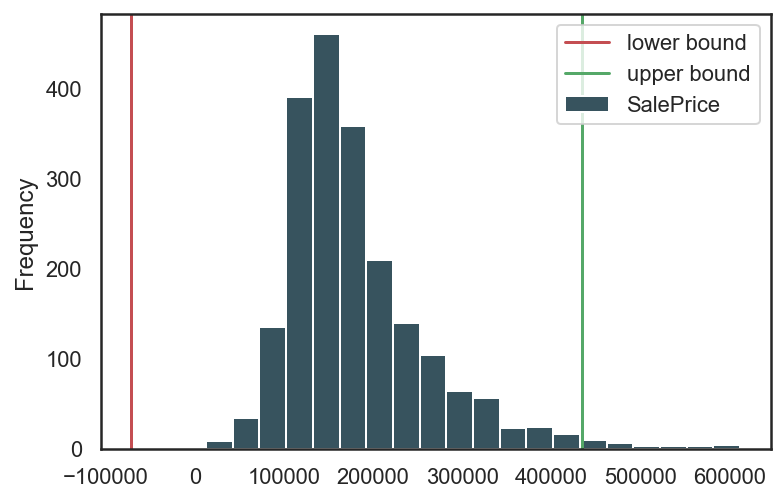

<Figure size 432x288 with 0 Axes>

In [30]:
train.SalePrice.plot.hist(bins=20)
plt.axvline(lower_bound, color = 'r', label = 'lower bound')
plt.axvline(upper_bound, color = 'g', label = 'upper bound')
plt.legend()
plt.show()
plt.savefig('./images/outlier1.png', facecolor= '#404040')

Compared to the 1.5 * IQR, the 3 * the IQR cuts a lot of the data. The outliers are primarily in the upper tail. This is a positively skewed distribution so outliers will be the high-priced homes.

In [31]:
train_grlivarea = train[['SalePrice', 'Gr Liv Area']]
train_grlivarea.head()

SalePrice  Gr Liv Area
Id                         
109     130500         1479
544     220000         2122
153     109000         1057
318     174000         1444
255     138500         1445

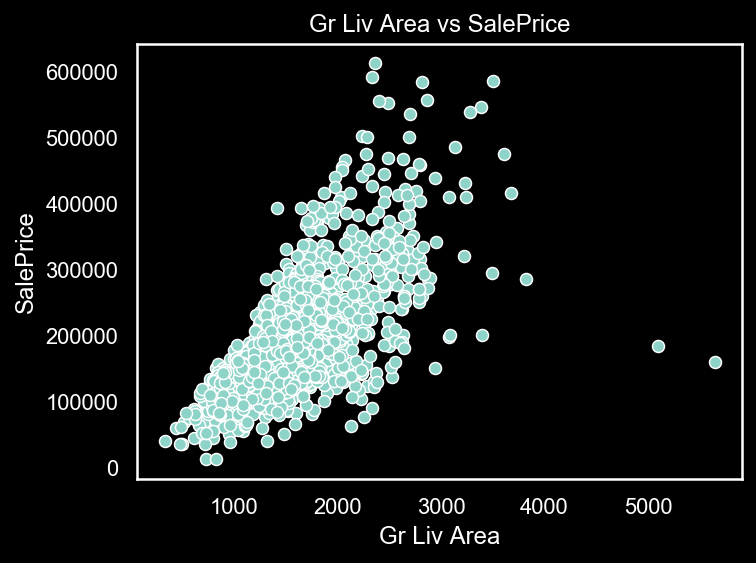

In [32]:
plt.style.use('dark_background')
plt.gcf().subplots_adjust(left=0.2)
sns.scatterplot(x=train_grlivarea['Gr Liv Area'], y = train_grlivarea['SalePrice'])
plt.title('Gr Liv Area vs SalePrice')
plt.savefig('./images/outlierplot.png',facecolor = '#404040')

As seen in the graph, there are 2 outliers which will affect the regression so, let's identify them and say bye!

In [33]:
# remove houses with more than 4000 sq
train_grlivarea_new = train[(train['Gr Liv Area'] < 4000)]
train_grlivarea_new.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                     
109           60        RL           0.0     13517   Pave          3   
544           60        RL          43.0     11492   Pave          3   
153           20        RL          68.0      7922   Pave          4   
318           60        RL          73.0      9802   Pave          4   
255           50        RL          82.0     14235   Pave          3   

    Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                            
109          Lvl          4    CulDSac           3       Sawyer        RRAe   
544          Lvl          4    CulDSac           3      SawyerW        Norm   
153          Lvl          4     Inside           3        NAmes        Norm   
318          Lvl          4     Inside           3       Timber        Norm   
255          Lvl          4     Inside           3      SawyerW        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
Id                                                                              
109        Norm      1Fam      2Story             6             8        1976   
544        Norm      1Fam      2Story             7             5        1996   
153        Norm      1Fam      1Story             5             7        1953   
318        Norm      1Fam      2Story             5             5        2006   
255        Norm      1Fam      1.5Fin             6             8        1900   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
Id                                                                   
109            2005      Gable   CompShg      HdBoard      Plywood   
544            1997      Gable   CompShg      VinylSd      VinylSd   
153            2007      Gable   CompShg      VinylSd      VinylSd   
318            2007      Gable   CompShg      VinylSd      VinylSd   
255            1993      Gable   CompShg      Wd Sdng      Plywood   

    Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond Foundation  Bsmt Qual  \
Id                                                                             
109      BrkFace         289.0           4           3     CBlock        4.0   
544      BrkFace         132.0           4           3      PConc        5.0   
153         None           0.0           3           4     CBlock        4.0   
318         None           0.0           3           3      PConc        5.0   
255         None           0.0           3           3      PConc        3.0   

     Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  \
Id                                                                            
109        4.0            2.0             7.0         533.0             2.0   
544        4.0            2.0             7.0         637.0             2.0   
153        4.0            2.0             7.0         731.0             2.0   
318        4.0            2.0             2.0           0.0             2.0   
255        5.0            2.0             2.0           0.0             2.0   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  Heating QC Central Air  \
Id                                                                              
109           0.0        192.0          725.0    GasA           5           Y   
544           0.0        276.0          913.0    GasA           5           Y   
153           0.0        326.0         1057.0    GasA           3           Y   
318           0.0        384.0          384.0    GasA           4           Y   
255           0.0        676.0          676.0    GasA           3           Y   

     Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
Id                                                                      
109           5         725         754                0  

Text(0.5, 1.0, 'Gr Liv Area vs SalePrice')

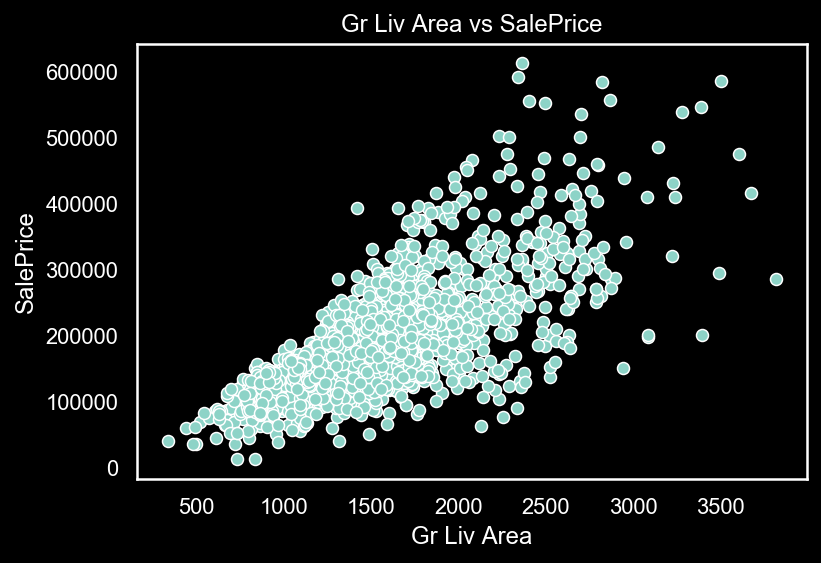

In [34]:
# just to check that outliers are removed
sns.scatterplot(x=train_grlivarea_new['Gr Liv Area'], y = train_grlivarea_new['SalePrice'])
plt.title('Gr Liv Area vs SalePrice') 

In [35]:
# change the name of the dataset after imputing the null values and managing the outliers
train_updated = train_grlivarea_new

**Statistical Analysis - .mean()**

Foundational: looking at how each features perform against the average house SalePrice

In [36]:
# check names of columns 
train_updated.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

Neighbourhood Locations (alphabetical): 

Blmngtn    Bloomington Heights

Blueste    Bluestem

BrDale    Briardale

BrkSide    Brookside

ClearCr    Clear Creek

CollgCr    College Creek

Crawfor    Crawford

Edwards    Edwards

Gilbert    Gilbert

IDOTRR    Iowa DOT and Rail Road

MeadowV    Meadow Village

Mitchel    Mitchell

Names    North Ames

NoRidge    Northridge

NPkVill    Northpark Villa

NridgHt    Northridge Heights

NWAmes    Northwest Ames

OldTown    Old Town

SWISU    South & West of Iowa State University

Sawyer    Sawyer

SawyerW    Sawyer West

Somerst    Somerset

StoneBr    Stone Brook

Timber    Timberland

Veenker    Veenker

This would be one of the important predictors of SalePrice considering that location is a crucial factor when purchasing real estate! Expect to see differing SalePrice in different neighbourhoods.

In [37]:
print(train_updated[['SalePrice']].mean())
nbh_sp = (train_updated.groupby('Neighborhood')['SalePrice'].mean()).sort_values(ascending=False)
nbh_sp
# list of neighbourhoods that fetch a higher than average SalePrice: StoneBr, NridgHt, NoRidge, GrnHill, Veenker, Timber, Somerst,ClearCr, Crawfor, CollgCr, Blmngtn, NWAmes, Gilbert, Greens, SawyerW


SalePrice    181479.018058
dtype: float64


Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    129905.787234
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64

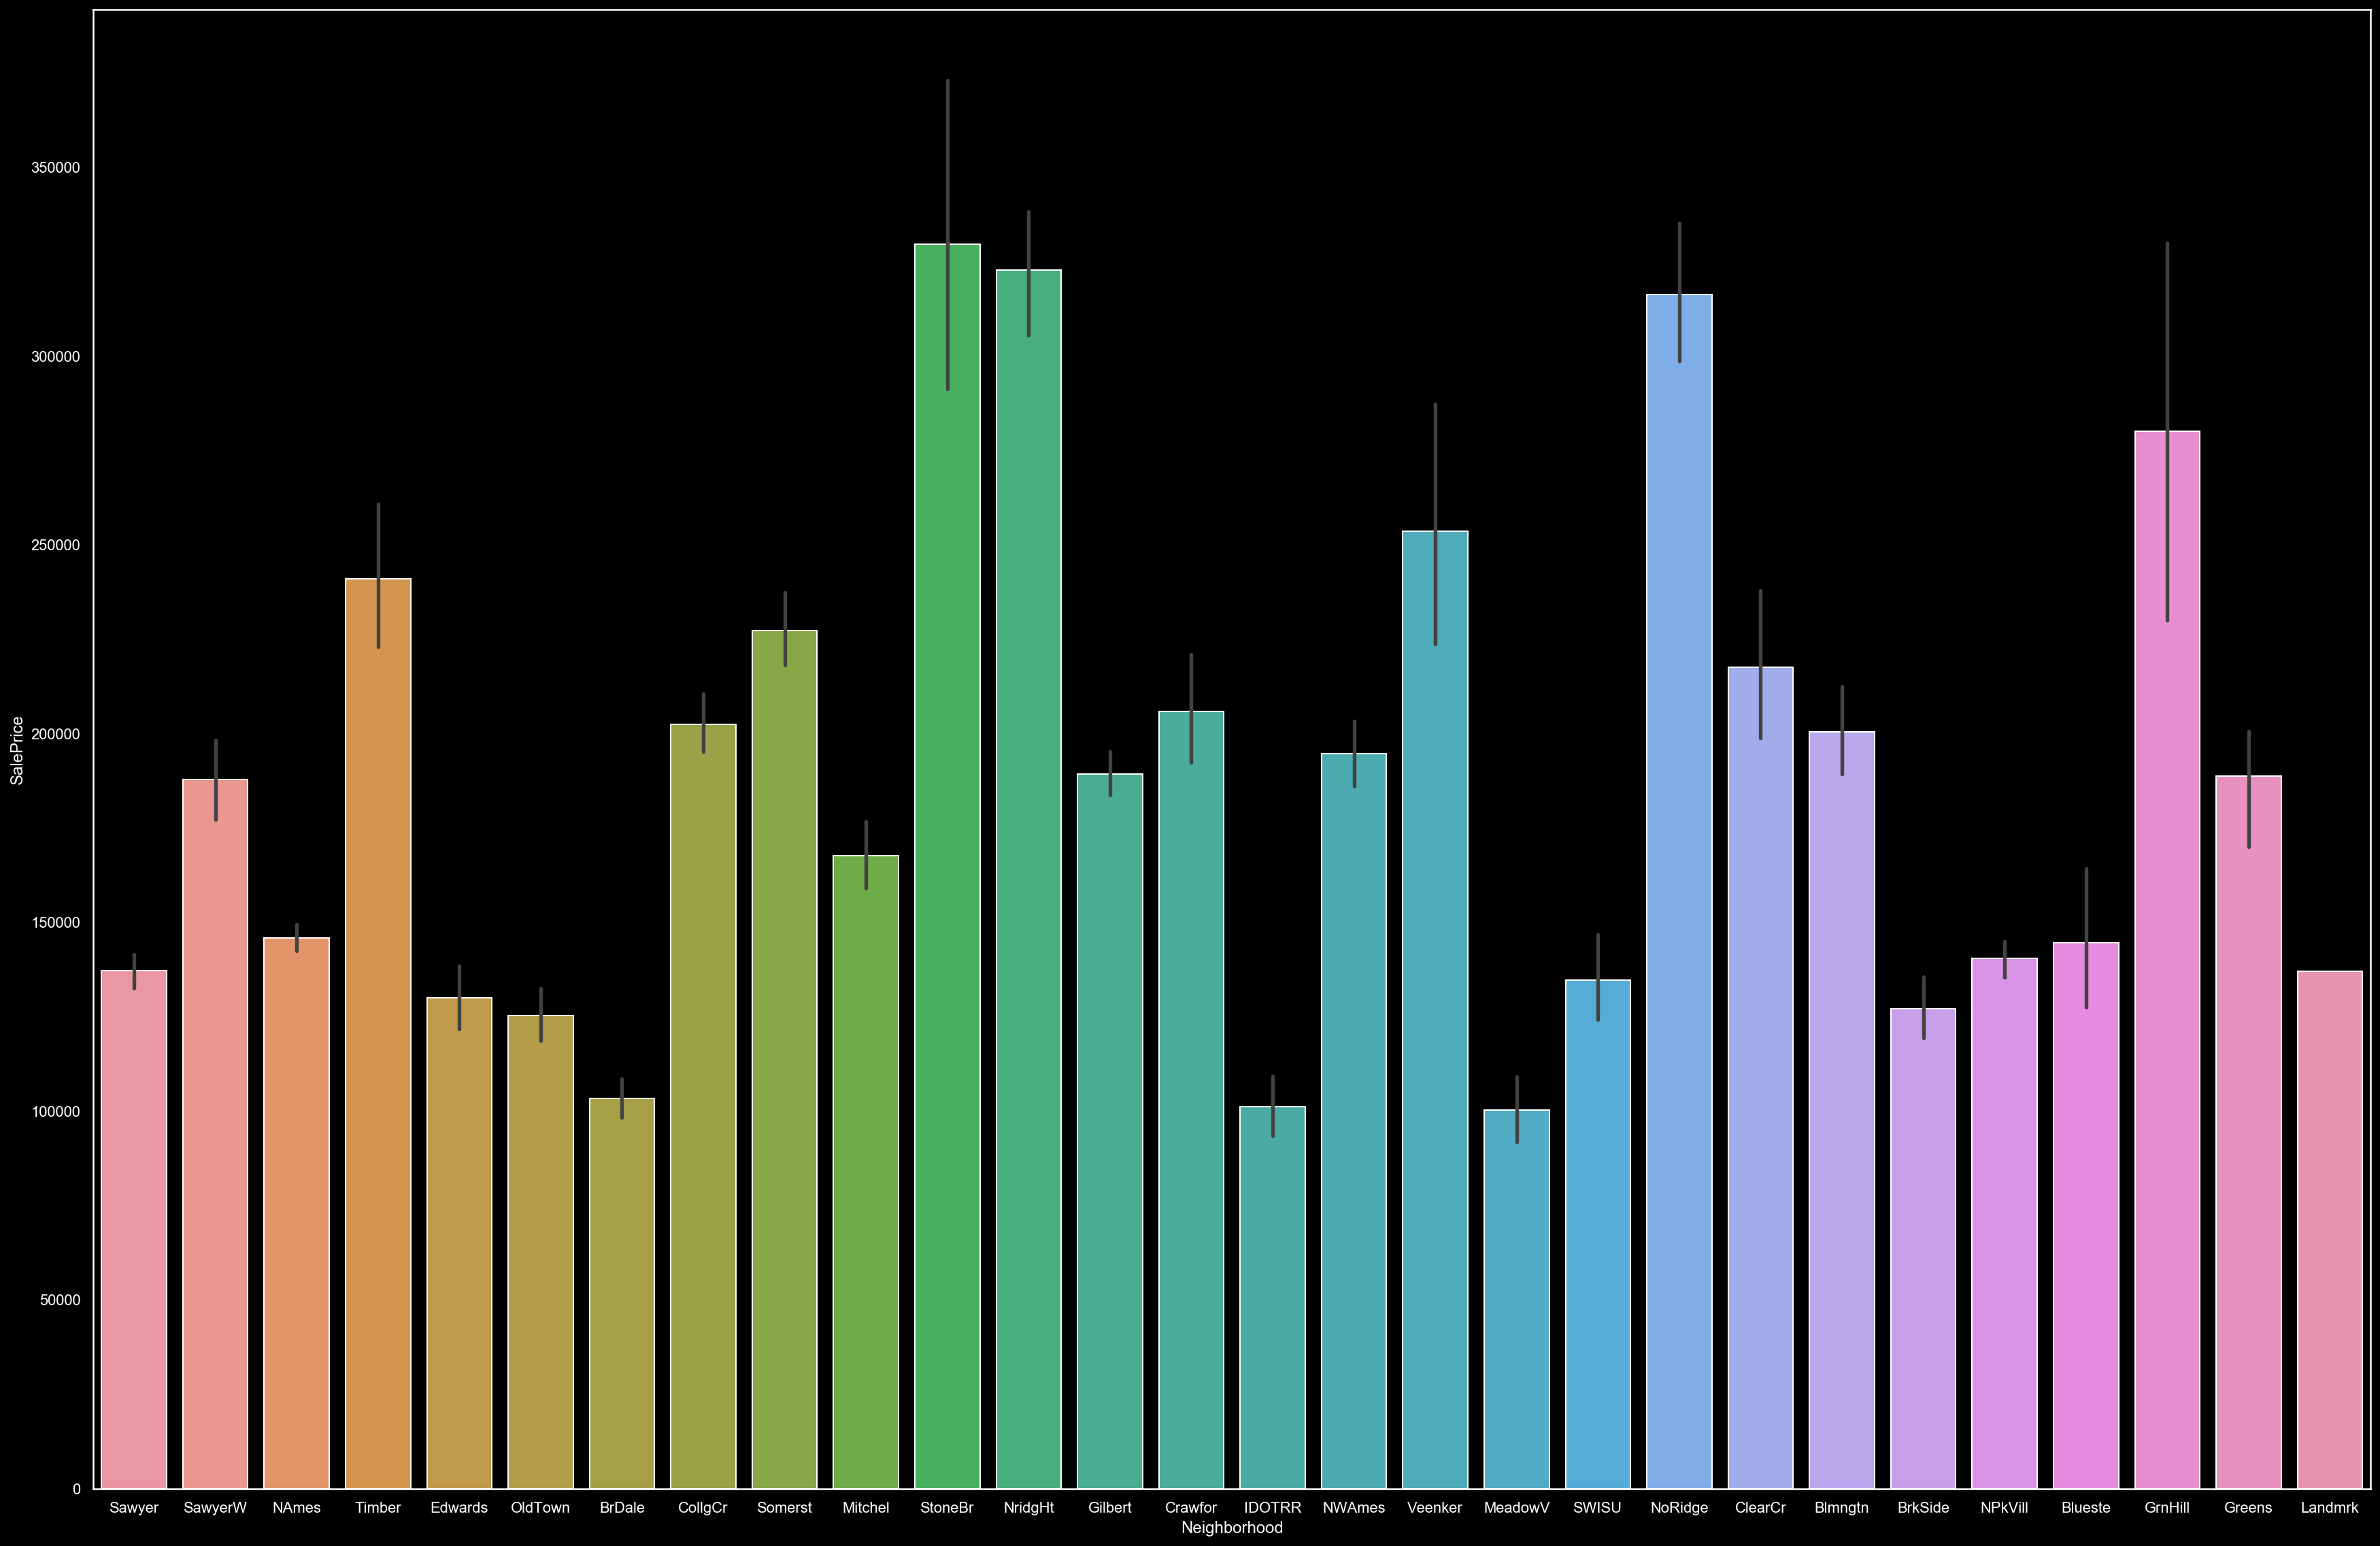

In [38]:
plt.figure(figsize=(30,20))
sns.barplot(x=train_updated['Neighborhood'], y=train_updated['SalePrice'])
plt.savefig('./images/nbh.png',facecolor = '#404040')

In [39]:
# setting an ordered list of neighbourhoods
orderlist_nbh = list(train_updated.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)

In [40]:
# look at the top 3 and worst 3 neighbourhoods
print('top 3 neighborhoods: ' + str())
print('mean price for 3 best neighborhoods: ' + str(train_updated[train_updated['Neighborhood'].isin(orderlist_nbh[:3])]['SalePrice'].mean()))
#print('\n')
print('mean price for 3 worst neighborhoods: ' + str(train_updated[train_updated['Neighborhood'].isin(orderlist_nbh[-3:])]['SalePrice'].mean()))


top 3 neighborhoods: 
mean price for 3 best neighborhoods: 322573.1778846154
mean price for 3 worst neighborhoods: 101301.07142857143


In [41]:
print(str('Mean SalePrice for a house in Iowa: ' + str(train_updated['SalePrice'].mean()))) 
train_updated.groupby('Neighborhood')['SalePrice'].describe().unstack().sort_values(ascending=True)['mean']

Mean SalePrice for a house in Iowa: 181479.01805758907


Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    129905.787234
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
dtype: float64

In [42]:
print(train_updated[['SalePrice']].mean())
lc_sp = (train_updated.groupby('Land Contour')['SalePrice'].mean()).sort_values(ascending=False)
lc_sp
# Properties with Hillside or Depressed flatness are considered more lucrative 

SalePrice    181479.018058
dtype: float64


Land Contour
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Bnk    142123.743590
Name: SalePrice, dtype: float64

Condition 1: Proximity to different factors 

Artery    Adjacent to arterial street

Feedr    Adjacent to feeder street    

Norm    Normal    

RRNn    Within 200' of North-South Railroad

RRAn    Adjacent to North-South Railroad

PosN    Near positive off-site feature--park, greenbelt, etc.

PosA    Adjacent to postive off-site feature

RRNe    Within 200' of East-West Railroad

RRAe    Adjacent to East-West Railroad

Condition1 feature will be quite interesting as PosA and PosN are normally suppose to have a positive effect on price.

In [43]:
print(train_updated[['SalePrice']].mean())
C1_sp = (train_updated.groupby('Condition 1')['SalePrice'].mean()).sort_values(ascending=False)
C1_sp
# after analysis, it seems that houses with proximity to the East-West railroad is not booming.  


SalePrice    181479.018058
dtype: float64


Condition 1
PosN      254794.296296
PosA      254733.333333
RRNn      198208.333333
Norm      185007.965459
RRAn      172604.777778
Feedr     143068.268519
RRAe      139685.714286
RRNe      129616.666667
Artery    128765.000000
Name: SalePrice, dtype: float64

Building; Type of Dwelling: 

1Fam    Single-family Detached    

2FmCon    Two-family Conversion; originally built as one-family dwelling

Duplx    Duplex

TwnhsE    Townhouse End Unit

TwnhsI    Townhouse Inside Unit

In [44]:
print(train_updated[['SalePrice']].mean())
Bldg_sp = (train_updated.groupby('Bldg Type')['SalePrice'].mean()).sort_values(ascending=False)
Bldg_sp
# Higher SalePrice houses are either Townhouse End Unit or Single-family Detached  

SalePrice    181479.018058
dtype: float64


Bldg Type
TwnhsE    198312.372671
1Fam      185291.411072
Duplex    139296.333333
Twnhs     133100.000000
2fmCon    123179.891304
Name: SalePrice, dtype: float64

In [45]:
print(train_updated[['SalePrice']].mean())
hs_sp = (train_updated.groupby('House Style')['SalePrice'].mean()).sort_values(ascending=False)
hs_sp
# Any houses with a 2.5 storey are more expensive

SalePrice    181479.018058
dtype: float64


House Style
2.5Fin    243666.666667
2Story    206486.700168
2.5Unf    191785.714286
1Story    179805.375236
SLvl      166248.989362
SFoyer    149343.920000
1.5Fin    136480.091743
1.5Unf    112466.666667
Name: SalePrice, dtype: float64

In [46]:
print(train_updated[['SalePrice']].mean())
rm_sp = (train_updated.groupby('Roof Matl')['SalePrice'].mean()).sort_values(ascending=False)
rm_sp
# Roofs with Metal or Roll or Clay/Tile is not something that houseowners look for

SalePrice    181479.018058
dtype: float64


Roof Matl
WdShngl    339400.000000
WdShake    264250.000000
Membran    241500.000000
Tar&Grv    187948.933333
CompShg    180847.714427
Name: SalePrice, dtype: float64

In [47]:
print(train_updated[['SalePrice']].mean())
ext_sp = train_updated[train_updated['Exterior 1st'] != train_updated['Exterior 2nd']]
ext_sp = (ext_sp.groupby(['Exterior 1st','Exterior 2nd'])['SalePrice'].mean()).sort_values(ascending=False)
ext_sp
# various combinations of materials can mark up house SalePrices 

SalePrice    181479.018058
dtype: float64


Exterior 1st  Exterior 2nd
CemntBd       Wd Shng         538000.000000
VinylSd       ImStucc         320000.000000
BrkFace       HdBoard         298750.000000
              MetalSd         290750.000000
Stone         HdBoard         287000.000000
WdShing       Wd Sdng         260000.000000
Plywood       Wd Sdng         244833.333333
BrkFace       Stucco          243538.000000
CemntBd       CmentBd         240758.727273
Wd Sdng       ImStucc         235500.000000
HdBoard       ImStucc         232250.000000
BrkFace       AsbShng         225000.000000
Stucco        Wd Sdng         218000.000000
HdBoard       BrkFace         215000.000000
Wd Sdng       Stone           200624.000000
              Stucco          199500.000000
HdBoard       Stucco          196500.000000
BrkFace       Wd Sdng         191820.000000
AsbShng       CmentBd         188000.000000
BrkFace       VinylSd         185900.000000
VinylSd       Plywood         184000.000000
HdBoard       AsphShn         175000.000000
Plywo

In [48]:
# lets combine all exterior types used
train_updated ['All_Exterior'] = train_updated['Exterior 1st'] + train_updated['Exterior 2nd']
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

In [49]:
print(train_updated[['SalePrice']].mean())
all_ext_sp = (train_updated.groupby('All_Exterior')['SalePrice'].mean()).sort_values(ascending=False)
all_ext_sp

SalePrice    181479.018058
dtype: float64


All_Exterior
CemntBdWd Shng    538000.000000
VinylSdImStucc    320000.000000
BrkFaceHdBoard    298750.000000
BrkFaceMetalSd    290750.000000
StoneHdBoard      287000.000000
ImStuccImStucc    262000.000000
WdShingWd Sdng    260000.000000
PlywoodWd Sdng    244833.333333
BrkFaceStucco     243538.000000
CemntBdCmentBd    240758.727273
Wd SdngImStucc    235500.000000
HdBoardImStucc    232250.000000
StoneStone        230000.000000
BrkFaceAsbShng    225000.000000
VinylSdVinylSd    219046.140449
StuccoWd Sdng     218000.000000
HdBoardBrkFace    215000.000000
Wd SdngStone      200624.000000
Wd SdngStucco     199500.000000
HdBoardStucco     196500.000000
BrkFaceWd Sdng    191820.000000
BrkFaceBrkFace    188023.437500
AsbShngCmentBd    188000.000000
BrkFaceVinylSd    185900.000000
VinylSdPlywood    184000.000000
HdBoardAsphShn    175000.000000
PlywoodImStucc    173400.000000
PlywoodPlywood    173285.008065
BrkFacePlywood    172683.333333
WdShingPlywood    168123.000000
Wd SdngHdBoard    167800.00

In [50]:
print(train_updated[['SalePrice']].mean())
f_sp = (train_updated.groupby('Foundation')['SalePrice'].mean()).sort_values(ascending=False)
f_sp
# only houses that has poured contrete 

SalePrice    181479.018058
dtype: float64


Foundation
PConc     227797.158009
Wood      173750.000000
CBlock    148415.530707
Stone     143235.200000
BrkTil    129050.190045
Slab      108810.676471
Name: SalePrice, dtype: float64

In [51]:
print(train_updated[['SalePrice']].mean())
h_sp = (train_updated.groupby('Heating')['SalePrice'].mean()).sort_values(ascending=False)
h_sp
# only gas forced warm air furnace

SalePrice    181479.018058
dtype: float64


Heating
GasA    182432.890873
GasW    151275.000000
OthW    125750.000000
Wall     77150.000000
Grav     65180.000000
Name: SalePrice, dtype: float64

In [52]:
print(train_updated[['SalePrice']].mean())
ca_sp = (train_updated.groupby('Central Air')['SalePrice'].mean()).sort_values(ascending=False)
ca_sp
# obviously, with central air conditioning! 

SalePrice    181479.018058
dtype: float64


Central Air
Y    187457.768344
N    100575.078014
Name: SalePrice, dtype: float64

In [53]:
print(train_updated[['SalePrice']].mean())
gt_sp = (train_updated.groupby('Garage Type')['SalePrice'].mean()).sort_values(ascending=False)
gt_sp
# having garage that is connected to the house are preferred

SalePrice    181479.018058
dtype: float64


Garage Type
BuiltIn    247883.522727
Attchd     205094.886045
2Types     157184.210526
Basment    143242.333333
Detchd     132132.947761
0          105669.150442
CarPort    103823.545455
Name: SalePrice, dtype: float64

There are also features that don't vary in price a lot such as the roof style and land slope.

In [54]:
print(train_updated[['SalePrice']].mean())
u_sp = (train_updated.groupby('Utilities')['SalePrice'].mean()).sort_values(ascending=False)
u_sp
# obviously, having a house that has all public utilities will be chosen

SalePrice    181479.018058
dtype: float64


Utilities
4    181561.007816
2    137500.000000
3     57625.000000
Name: SalePrice, dtype: float64

In [55]:
print(train_updated[['SalePrice']].mean())
oq_sp = (train_updated.groupby('Overall Qual')['SalePrice'].mean()).sort_values(ascending=False)
oq_sp
# a house with a rating of at least 7 

SalePrice    181479.018058
dtype: float64


Overall Qual
10    440774.809524
9     370197.376623
8     271437.044000
7     203430.285383
6     162891.102767
5     134963.644760
4     107744.037736
3      81309.103448
2      51081.000000
1      48725.000000
Name: SalePrice, dtype: float64

In [56]:
print(train_updated[['SalePrice']].mean())
oc_sp = (train_updated.groupby('Overall Cond')['SalePrice'].mean()).sort_values(ascending=False)
oc_sp
# so i guess houseowners in Iowa goes for either the 2nd best (excellent) or average..
## further analysis on the average rating houses is needed 

SalePrice    181479.018058
dtype: float64


Overall Cond
5    207116.247856
9    198177.586207
8    155913.366337
7    155327.270370
6    148952.665761
4    114034.571429
3     99786.000000
2     65364.833333
1     59625.000000
Name: SalePrice, dtype: float64

In [57]:
print(train_updated[['SalePrice']].mean())
eq_sp = (train_updated.groupby('Exter Qual')['SalePrice'].mean()).sort_values(ascending=False)
eq_sp
# either good or excellent can be accepted for the quality of exterior house material

SalePrice    181479.018058
dtype: float64


Exter Qual
5    379587.784810
4    230802.484935
3    143270.978348
2     89801.192308
Name: SalePrice, dtype: float64

In [58]:
print(train_updated[['SalePrice']].mean())
ec_sp = (train_updated.groupby('Exter Cond')['SalePrice'].mean()).sort_values(ascending=False)
ec_sp
# so i guess houseowners in Iowa goes for either the 2nd best (excellent) or average..
## further analysis on the average rating houses is needed 
### links to the overall condition oc_sp

SalePrice    181479.018058
dtype: float64


Exter Cond
5    236263.857143
3    185273.217342
4    167623.023256
2    102507.693878
1     44800.000000
Name: SalePrice, dtype: float64

In [59]:
print(train_updated[['SalePrice']].mean())
bq_sp = (train_updated.groupby('Bsmt Qual')['SalePrice'].mean()).sort_values(ascending=False)
bq_sp
# height of basement needs to be at least 90 inches 

SalePrice    181479.018058
dtype: float64


Bsmt Qual
6.0    331238.285714
5.0    202537.582176
4.0    139988.461105
3.0    107752.166667
0.0    106341.345455
2.0     89000.000000
Name: SalePrice, dtype: float64

In [60]:
print(train_updated[['SalePrice']].mean())
bc_sp = (train_updated.groupby('Bsmt Cond')['SalePrice'].mean()).sort_values(ascending=False)
bc_sp
# in the further analysis of condition 

SalePrice    181479.018058
dtype: float64


Bsmt Cond
5.0    223969.550562
6.0    195000.000000
4.0    184035.064410
2.0    124063.200000
3.0    118629.076923
0.0    106341.345455
Name: SalePrice, dtype: float64

In [61]:
print(train_updated[['SalePrice']].mean())
hqc_sp = (train_updated.groupby('Heating QC')['SalePrice'].mean()).sort_values(ascending=False)
hqc_sp
# only excellent heating quality is considered

SalePrice    181479.018058
dtype: float64


Heating QC
5    216110.585136
4    160174.009404
3    138986.705193
2    117123.641791
1     69033.333333
Name: SalePrice, dtype: float64

In [62]:
print(train_updated[['SalePrice']].mean())
elec_sp = (train_updated.groupby('Electrical')['SalePrice'].mean()).sort_values(ascending=False)
elec_sp
# only standard circuit breakers & romex is considered

SalePrice    181479.018058
dtype: float64


Electrical
5    187787.365488
4    122565.157143
3    103678.914286
2     83485.714286
1     67000.000000
Name: SalePrice, dtype: float64

In [63]:
print(train_updated[['SalePrice']].mean())
kq_sp = (train_updated.groupby('Kitchen Qual')['SalePrice'].mean()).sort_values(ascending=False)
kq_sp
# only excellent kitchen quality is considerd, persay 

SalePrice    181479.018058
dtype: float64


Kitchen Qual
5    338632.510067
4    211629.451613
3    139501.607450
2    101334.957447
Name: SalePrice, dtype: float64

In [64]:
print(train_updated[['SalePrice']].mean())
func_sp = (train_updated.groupby('Functional')['SalePrice'].mean()).sort_values(ascending=False)
func_sp
#

SalePrice    181479.018058
dtype: float64


Functional
8    183967.326189
4    163106.166667
7    154429.761905
6    150424.571429
5    148108.724138
2     95750.000000
3     87157.714286
1     31550.000000
Name: SalePrice, dtype: float64

In [65]:
print(train_updated[['SalePrice']].mean())
gq_sp = (train_updated.groupby('Garage Qual')['SalePrice'].mean()).sort_values(ascending=False)
gq_sp
# either good or excellent rating is considered.. 

SalePrice    181479.018058
dtype: float64


Garage Qual
5.0    262989.277778
6.0    241000.000000
4.0    188330.610383
3.0    116184.890244
0.0    106065.991228
2.0     65000.000000
Name: SalePrice, dtype: float64

In [66]:
print(train_updated[['SalePrice']].mean())
gc_sp = (train_updated.groupby('Garage Cond')['SalePrice'].mean()).sort_values(ascending=False)
gc_sp
# excellent does not matter, as long as the garage is typically average or good will be sufficient

SalePrice    181479.018058
dtype: float64


Garage Cond
5.0    209030.833333
4.0    188229.357449
6.0    124000.000000
3.0    107387.957447
0.0    106065.991228
2.0     89925.000000
Name: SalePrice, dtype: float64

In [67]:
print(train_updated[['SalePrice']].mean())
pd_sp = (train_updated.groupby('Paved Drive')['SalePrice'].mean()).sort_values(ascending=False)
pd_sp
# obviously houseowners will except it to be paved for easy access

SalePrice    181479.018058
dtype: float64


Paved Drive
3    188810.310382
2    129824.461538
1    104562.827815
Name: SalePrice, dtype: float64

<span style="text-decoration: underline">Square Footage</span>

There are a number of features that indicate the square footage of different features, for instance the 1st floor, 2nd floor, Bsmt. These are continuous values that represent square footage. We will just be focusing on the Square Footage to evaluate the size of the property.


In [68]:
print(train_updated[['Total Bsmt SF']].max())
print(train_updated[['Total Bsmt SF']].min())

Total Bsmt SF    3206.0
dtype: float64
Total Bsmt SF    0.0
dtype: float64


In [69]:
# cut into 9 categories of the bsmt sf where min is 0 and the max is 3500
cat_bsmt = np.linspace(0,3500, 10)
cat_bsmt

array([   0.        ,  388.88888889,  777.77777778, 1166.66666667,
       1555.55555556, 1944.44444444, 2333.33333333, 2722.22222222,
       3111.11111111, 3500.        ])

In [70]:
train_updated['Basement_SF_Cat'] = pd.cut(train_updated['Total Bsmt SF'], bins= cat_bsmt, labels=[1,2,3,4,5,6,7,8,9],include_lowest=True)
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

In [71]:
print(train_updated[['SalePrice']].mean())
bsmt_sf_sp = (train_updated.groupby('Basement_SF_Cat')['SalePrice'].mean()).sort_values(ascending=False)
bsmt_sf_sp
#

SalePrice    181479.018058
dtype: float64


Basement_SF_Cat
8    527500.000000
7    441981.888889
6    360951.861111
9    357000.000000
5    270359.577273
4    211255.204651
3    161022.479358
2    133311.616368
1    117863.390805
Name: SalePrice, dtype: float64

In [72]:
train_updated ['Total_Floor_SF'] = train_updated['1st Flr SF'] + train_updated['2nd Flr SF']
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

In [73]:
print(train_updated[['Total_Floor_SF']].max())
print(train_updated[['Total_Floor_SF']].min())

Total_Floor_SF    3820
dtype: int64
Total_Floor_SF    334
dtype: int64


In [74]:
# cut into 9 categories of the floor sf where min is 330 and the max is 3900
cat_flr = np.linspace(300,3900, 10)
cat_flr

array([ 300.,  700., 1100., 1500., 1900., 2300., 2700., 3100., 3500.,
       3900.])

In [75]:
train_updated['Floor_SF_Cat'] = pd.cut(train_updated['Total_Floor_SF'], bins= cat_flr, labels=[1,2,3,4,5,6,7,8,9])
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

In [76]:
print(train_updated[['SalePrice']].mean())
flr_sf_sp = (train_updated.groupby('Floor_SF_Cat')['SalePrice'].mean()).sort_values(ascending=False)
flr_sf_sp
#

SalePrice    181479.018058
dtype: float64


Floor_SF_Cat
8    450965.500000
9    349850.000000
7    344135.548387
6    307970.960396
5    245110.681159
4    204845.309481
3    157546.067669
2    119629.946667
1     73914.038462
Name: SalePrice, dtype: float64

In [77]:
print(train_updated[['Garage Area']].min())
print(train_updated[['Garage Area']].max())

Garage Area    0.0
dtype: float64
Garage Area    1356.0
dtype: float64


In [78]:
# cut into 9 categories of the garage sf where min is 0 and the max is 1500
cat_gar = np.linspace(0,1500,10)
cat_gar

array([   0.        ,  166.66666667,  333.33333333,  500.        ,
        666.66666667,  833.33333333, 1000.        , 1166.66666667,
       1333.33333333, 1500.        ])

In [79]:
train_updated['Garage_SF_Cat'] = pd.cut(train_updated['Garage Area'], bins= cat_gar, labels=[1,2,3,4,5,6,7,8,9], include_lowest=True)
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

In [80]:
print(train_updated[['SalePrice']].mean())
gar_sf_sp = (train_updated.groupby('Garage_SF_Cat')['SalePrice'].mean()).sort_values(ascending=False)
gar_sf_sp
#

SalePrice    181479.018058
dtype: float64


Garage_SF_Cat
7    352886.642857
9    321500.000000
8    310813.400000
6    302557.064220
5    267516.282828
4    194072.797101
3    167440.896714
2    126492.807786
1    106341.369748
Name: SalePrice, dtype: float64

In [81]:
train_updated.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

according to data documentation (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt),

These, despite being years, are numeric values. Hence, Convert Years to a more useful numeric value, age in years at time of sale.

Considered exploring the Built Age (Yr Sold - Yr Built) where train_updated['Built_age'] = train_updated['Yr Sold'] - train_updated['Year Built']

<span style="text-decoration: underline">Time</span>

For example, when was the home built? Remodeled? Sold? 
Some cool feature engineering to do here. Like using the Yr Sold and Year Remod/Add to get the age of different remodels.


In [82]:
# chose the Remod/Add years rather than the original construction date as it is the new year if there are any upgrades and stays the same of there are no upgrading works done
print(train_updated[['SalePrice']].mean())
yr_ra_sp = (train_updated.groupby('Year Remod/Add')['SalePrice'].mean()).sort_values(ascending=False)
yr_ra_sp
#

SalePrice    181479.018058
dtype: float64


Year Remod/Add
2010    293068.250000
2009    284718.681818
2008    282597.074074
2006    243669.496403
2007    234690.170732
1981    221466.666667
2002    218337.966102
1986    218166.666667
2005    216272.370000
1993    211788.000000
1997    211625.862069
1987    209950.000000
1998    208336.274510
2000    203931.652174
1995    202473.684211
2004    202015.397590
2003    201798.308824
1994    199990.243902
1999    198938.630435
2001    198467.142857
1989    193850.000000
1988    193125.000000
1990    192375.217391
1996    185973.809524
1985    178129.333333
1992    177894.736842
1991    174947.368421
1984    167491.666667
1978    163131.666667
1974    162040.000000
1977    160240.322581
1969    159481.812500
1980    158287.500000
1976    157025.156250
1975    154062.269231
1966    152814.210526
1979    150225.687500
1964    148959.058824
1960    145020.000000
1968    144568.928571
1957    143627.200000
1983    143042.857143
1961    142094.117647
1967    142027.272727
1963    141761.57

In [83]:
# since we are dealing with the Year of Remod/Add, we will correspond that with the Year Sold 
print(train_updated[['SalePrice']].mean())
yr_sold_sp = (train_updated.groupby('Yr Sold')['SalePrice'].mean()).sort_values(ascending=False)
yr_sold_sp
# 2007 to 2009 saw houseowners pay more than average

SalePrice    181479.018058
dtype: float64


Yr Sold
2007    185527.883300
2009    182455.244395
2008    181800.488479
2006    179471.609589
2010    174180.059829
Name: SalePrice, dtype: float64

In [84]:
# features_nom = ['nbh_sp' + 'alley_sp' + 'lc_sp' + 'C1_sp' + 'Bldg_sp' + 'hs_sp' + 'rm_sp' + 'all_ext_sp' + 'f_sp' + 'h_sp' + 'ca_sp' + 'gt_sp' + 'mf_sp'] 
# features_ord = ['u_sp' + 'oq_sp' + 'oc_sp' + 'eq_sp' + 'ec_sp' + 'bq_sp' + 'bc_sp' + 'hqc_sp' + 'elec_sp' + 'kq_sp' + 'func_sp' + 'gq_sp' + 'gc_sp' + 'pd_sp' + 'fence_sp']
# features_cont = ['bsmt_sf_sp' + 'flr_sf_sp' + 'gar_sf_sp']
# features_disc = ['yr_ra_sp' + 'yr_sold_sp']


In [85]:
#checking null values
train_updated.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

In [86]:
# Interaction term for Total SF

train_updated['FTotal SF'] = train_updated['Total Bsmt SF'] + train_updated['Total_Floor_SF']



In [87]:
train_updated

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
Id                                                                      
109            60        RL           0.0     13517   Pave          3   
544            60        RL          43.0     11492   Pave          3   
153            20        RL          68.0      7922   Pave          4   
318            60        RL          73.0      9802   Pave          4   
255            50        RL          82.0     14235   Pave          3   
...           ...       ...           ...       ...    ...        ...   
1587           20        RL          79.0     11449   Pave          3   
785            30        RL           0.0     12342   Pave          3   
916            50        RL          57.0      7558   Pave          4   
639            20        RL          80.0     10400   Pave          4   
10             60        RL          60.0      7500   Pave          4   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
Id                                                                             
109           Lvl          4    CulDSac           3       Sawyer        RRAe   
544           Lvl          4    CulDSac           3      SawyerW        Norm   
153           Lvl          4     Inside           3        NAmes        Norm   
318           Lvl          4     Inside           3       Timber        Norm   
255           Lvl          4     Inside           3      SawyerW        Norm   
...           ...        ...        ...         ...          ...         ...   
1587          HLS          4     Inside           3       Timber        Norm   
785           Lvl          4     Inside           3      Edwards        Norm   
916           Bnk          4     Inside           3      Crawfor        Norm   
639           Lvl          4     Corner           3        NAmes        Norm   
10            Lvl          4     Inside           3      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                   
109         Norm      1Fam      2Story             6             8   
544         Norm      1Fam      2Story             7             5   
153         Norm      1Fam      1Story             5             7   
318         Norm      1Fam      2Story             5             5   
255         Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
1587        Norm      1Fam      1Story             8             5   
785         Norm      1Fam      1Story             4             5   
916         Norm      1Fam      1.5Fin             6             6   
639         Norm      1Fam      1Story             4             5   
10          Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                   
109         1976            2005      Gable   CompShg      HdBoard   
544         1996            1997      Gable   CompShg      VinylSd   
153         1953            2007      Gable   CompShg      VinylSd   
318         2006            2007      Gable   CompShg      VinylSd   
255         1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1587        2007            2007      Gable   CompShg      VinylSd   
785         1940            1950      Gable   CompShg      VinylSd   
916         1928            1950      Gable   CompShg      BrkFace   
639         1956            1956      Gable   CompShg      Plywood   
10          1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond  \
Id                                                                     
109       Plywood      BrkFace         289.0     

Those houses with no alley in the old town, is the most popular. Houses adjacent to the arterial street with this 2.5Fin specificiations is most looked-for concept for house buyers in Iowa. This could be because the size and the historical location of the property that garner most positive reactions. 

**Split into Categorical and Continuous Variables**

In [91]:
train_cat = train_updated[['SalePrice']]
train_cont = train_updated[['SalePrice']]


In [92]:
for i in train_updated.columns:
    if (i == 'SalePrice'):
        pass
    elif (train_updated[i].dtype == 'object'):
        train_cat[i] = train_updated[i]
    else:
        train_cont[i] = train_updated[i]

In [93]:
train_cont.drop(columns='Lot Frontage')

SalePrice  MS SubClass  Lot Area  Lot Shape  Utilities  Land Slope  \
Id                                                                         
109      130500           60     13517          3          4           3   
544      220000           60     11492          3          4           3   
153      109000           20      7922          4          4           3   
318      174000           60      9802          4          4           3   
255      138500           50     14235          3          4           3   
...         ...          ...       ...        ...        ...         ...   
1587     298751           20     11449          3          4           3   
785       82500           30     12342          3          4           3   
916      177000           50      7558          4          4           3   
639      144000           20     10400          4          4           3   
10       189000           60      7500          4          4           3   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
Id                                                                           
109              6             8        1976            2005         289.0   
544              7             5        1996            1997         132.0   
153              5             7        1953            2007           0.0   
318              5             5        2006            2007           0.0   
255              6             8        1900            1993           0.0   
...            ...           ...         ...             ...           ...   
1587             8             5        2007            2007           0.0   
785              4             5        1940            1950           0.0   
916              6             6        1928            1950           0.0   
639              4             5        1956            1956           0.0   
10               7             5        1999            1999           0.0   

      Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                  
109            4           3        4.0        4.0            2.0   
544            4           3        5.0        4.0            2.0   
153            3           4        4.0        4.0            2.0   
318            3           3        5.0        4.0            2.0   
255            3           3        3.0        5.0            2.0   
...          ...         ...        ...        ...            ...   
1587           4           3        5.0        4.0            4.0   
785            3           3        4.0        4.0            2.0   
916            3           3        4.0        4.0            2.0   
639            3           3        4.0        4.0            2.0   
10             3           3        4.0        4.0            2.0   

      BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                              
109              7.0         533.0             2.0           0.0        192.0   
544              7.0         637.0             2.0           0.0        276.0   
153              7.0         731.0             2.0           0.0        326.0   
318              2.0           0.0             2.0           0.0        384.0   
255              2.0           0.0             2.0           0.0        676.0   
...              ...           ...             ...           ...          ...   
1587             7.0        1011.0             2.0           0.0        873.0   
785              5.0         262.0             2.0           0.0        599.0   
916              2.0           0.0             2.0           0.0        896.0   
639              4.0         155.0             3.0         750.0        295.0   
10               2.0           0.0             2.0           0.0        994.0   

      Total Bsmt SF  Heating QC  Electrical  1st F

In [98]:
train_ord = train_updated[['SalePrice','Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual' , 'Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Electrical', 'Functional','Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive','Heating QC','Kitchen Qual','Fireplace Qu']]
train_nom = train_updated[['SalePrice', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config' ,'Neighborhood', 'Condition 1' ,'Condition 2' ,'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Heating','Central Air', 'Garage Type', 'Sale Type', 'Exterior 1st', 'Exterior 2nd']]


In [101]:
train_ord.drop(columns=['Utilities', 'Land Slope', 'Electrical'],inplace=True,axis=1)

In [102]:
train_ord.columns

Index(['SalePrice', 'Lot Shape', 'Overall Qual', 'Overall Cond', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Functional', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Heating QC',
       'Kitchen Qual', 'Fireplace Qu'],
      dtype='object')

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train_ord, cmap=sns.diverging_palette(20,220,n=100),annot=True)

In [ ]:
def histo(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.show()

In [ ]:
histo(train_updated,train_nom,len(train_num)/2+1,2)

In [ ]:
def scatter(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='SalePrice',data=df,fit_reg=False)
        ax.set_title(var_name +" vs. SalePrice")
    fig.tight_layout()
    plt.show()

In [ ]:
scatter(train_updated,train_nom[:-1],len(train_num[:-1])/2+1,2)
        

# Exploratory Visualizations

Though columns are categorical eg numerical, plotting out histograms allows for better visualisation and an insight to the skewness.

In [ ]:
#looking at skewness of SalePrice from the train dataset
sns.distplot(train_updated['SalePrice']);
print('Skewness: %f' %  train['SalePrice'].skew())
print('Kurtosis: %f' %  train['SalePrice'].kurtosis())

**Distribution Plots To Explore Relationships Between Features And SalePrice**

**Correlations**

Should a feature have an effect on SalePrice, they will be some correlation. A correlation of at least 0.7 will be considered high. 

However, there are some features that seem to strongly covary with a home's sale price. A few examples include the overall quality, lot square footage, and number of rooms above ground. It seems like there are many numerical features we could use to predict the price of a house. Now let's check out some non-numeric features!

In [ ]:
#saleprice correlation matrix
plt.figure(figsize=(20,20))
k = 35 #number of variables for heatmap
corr = train_updated.corr()
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_updated[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig('./images/corr.png')

In [159]:
train_model_nom = train_nom[['SalePrice','MS Zoning', "Street", 'Neighborhood','Condition 1', 'Condition 2', 'House Style', 'Roof Matl', 'Heating', "Central Air", "Garage Type", "Sale Type"]]
train_model_nom = pd.get_dummies(train_model_nom, drop_first=True)
train_model_nom

SalePrice  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
Id                                                                    
109      130500                  0             0                  0   
544      220000                  0             0                  0   
153      109000                  0             0                  0   
318      174000                  0             0                  0   
255      138500                  0             0                  0   
...         ...                ...           ...                ...   
1587     298751                  0             0                  0   
785       82500                  0             0                  0   
916      177000                  0             0                  0   
639      144000                  0             0                  0   
10       189000                  0             0                  0   

      MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Pave  \
Id                                                            
109              0             1             0            1   
544              0             1             0            1   
153              0             1             0            1   
318              0             1             0            1   
255              0             1             0            1   
...            ...           ...           ...          ...   
1587             0             1             0            1   
785              0             1             0            1   
916              0             1             0            1   
639              0             1             0            1   
10               0             1             0            1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
Id                                                                      
109                      0                    0                     0   
544                      0                    0                     0   
153                      0                    0                     0   
318                      0                    0                     0   
255                      0                    0                     0   
...                    ...                  ...                   ...   
1587                     0                    0                     0   
785                      0                    0                     0   
916                      0                    0                     0   
639                      0                    0                     0   
10                       0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
Id                                                                       
109                      0                     0                     0   
544                      0                     0                     0   
153                      0                     0                     0   
318                      0                     0                     0   
255                      0                     0                     0   
...                    ...                   ...                   ...   
1587                     0                     0                     0   
785                      0                     0                     0   
916                      0                     0                     1   
639                      0                     0                     0   
10                       0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
Id                                                                      
109                      0                     0                    0   
544                      0                     0                    0   
153                      0                     0         

In [103]:
corr_ord = train_ord.corr()
corr_ord.sort_values(["SalePrice"], ascending=False, inplace= True)
corr_ord["SalePrice"].head(11)

SalePrice         1.000000
Overall Qual      0.803462
Exter Qual        0.715048
Kitchen Qual      0.694295
Bsmt Qual         0.570779
Garage Finish     0.541040
Fireplace Qu      0.532279
Heating QC        0.458636
Bsmt Exposure     0.427780
BsmtFin Type 1    0.354273
Paved Drive       0.290528
Name: SalePrice, dtype: float64

In [104]:
train_model_ord = train_ord[corr_ord["SalePrice"].iloc[0:11].index ]
train_model_ord

SalePrice  Overall Qual  Exter Qual  Kitchen Qual  Bsmt Qual  \
Id                                                                   
109      130500             6           4             4        4.0   
544      220000             7           4             4        5.0   
153      109000             5           3             4        4.0   
318      174000             5           3             3        5.0   
255      138500             6           3             3        3.0   
...         ...           ...         ...           ...        ...   
1587     298751             8           4             4        5.0   
785       82500             4           3             3        4.0   
916      177000             6           3             3        4.0   
639      144000             4           3             3        4.0   
10       189000             7           3             4        4.0   

      Garage Finish  Fireplace Qu  Heating QC  Bsmt Exposure  BsmtFin Type 1  \
Id                                                                             
109             3.0           0.0           5            2.0             7.0   
544             3.0           4.0           5            2.0             7.0   
153             2.0           0.0           3            2.0             7.0   
318             4.0           0.0           4            2.0             2.0   
255             2.0           0.0           3            2.0             2.0   
...             ...           ...         ...            ...             ...   
1587            4.0           5.0           5            4.0             7.0   
785             2.0           0.0           5            2.0             5.0   
916             2.0           4.0           4            2.0             2.0   
639             2.0           5.0           3            2.0             4.0   
10              4.0           4.0           4            2.0             2.0   

      Paved Drive  
Id                 
109             3  
544             3  
153             3  
318             3  
255             1  
...           ...  
1587            3  
785             3  
916             3  
639             3  
10              3  

[2049 rows x 11 columns]

In [108]:
corr_cont = train_cont.corr()
train_model_cont = train_cont[corr_cont["SalePrice"].iloc[0:11].index]
train_model_cont

SalePrice  MS SubClass  Lot Frontage  Lot Area  Lot Shape  Utilities  \
Id                                                                           
109      130500           60           0.0     13517          3          4   
544      220000           60          43.0     11492          3          4   
153      109000           20          68.0      7922          4          4   
318      174000           60          73.0      9802          4          4   
255      138500           50          82.0     14235          3          4   
...         ...          ...           ...       ...        ...        ...   
1587     298751           20          79.0     11449          3          4   
785       82500           30           0.0     12342          3          4   
916      177000           50          57.0      7558          4          4   
639      144000           20          80.0     10400          4          4   
10       189000           60          60.0      7500          4          4   

      Land Slope  Overall Qual  Overall Cond  Year Built  Year Remod/Add  
Id                                                                        
109            3             6             8        1976            2005  
544            3             7             5        1996            1997  
153            3             5             7        1953            2007  
318            3             5             5        2006            2007  
255            3             6             8        1900            1993  
...          ...           ...           ...         ...             ...  
1587           3             8             5        2007            2007  
785            3             4             5        1940            1950  
916            3             6             6        1928            1950  
639            3             4             5        1956            1956  
10             3             7             5        1999            1999  

[2049 rows x 11 columns]

In [161]:
train_model_cont_td = pd.get_dummies(train_model_cont, drop_first=True)
train_model_cont_td


SalePrice  MS SubClass  Lot Frontage  Lot Area  Lot Shape  Utilities  \
Id                                                                           
109      130500           60           0.0     13517          3          4   
544      220000           60          43.0     11492          3          4   
153      109000           20          68.0      7922          4          4   
318      174000           60          73.0      9802          4          4   
255      138500           50          82.0     14235          3          4   
...         ...          ...           ...       ...        ...        ...   
1587     298751           20          79.0     11449          3          4   
785       82500           30           0.0     12342          3          4   
916      177000           50          57.0      7558          4          4   
639      144000           20          80.0     10400          4          4   
10       189000           60          60.0      7500          4          4   

      Land Slope  Overall Qual  Overall Cond  Year Built  Year Remod/Add  
Id                                                                        
109            3             6             8        1976            2005  
544            3             7             5        1996            1997  
153            3             5             7        1953            2007  
318            3             5             5        2006            2007  
255            3             6             8        1900            1993  
...          ...           ...           ...         ...             ...  
1587           3             8             5        2007            2007  
785            3             4             5        1940            1950  
916            3             6             6        1928            1950  
639            3             4             5        1956            1956  
10             3             7             5        1999            1999  

[2049 rows x 11 columns]

In [111]:
train_latest = pd.concat([pd.concat([train_cont, train_ord.drop(columns = "SalePrice")], axis=1),train_nom.drop(columns = "SalePrice")], axis=1)
train_latest.head()

SalePrice  MS SubClass  Lot Frontage  Lot Area  Lot Shape  Utilities  \
Id                                                                          
109     130500           60           0.0     13517          3          4   
544     220000           60          43.0     11492          3          4   
153     109000           20          68.0      7922          4          4   
318     174000           60          73.0      9802          4          4   
255     138500           50          82.0     14235          3          4   

     Land Slope  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                                                                        
109           3             6             8        1976            2005   
544           3             7             5        1996            1997   
153           3             5             7        1953            2007   
318           3             5             5        2006            2007   
255           3             6             8        1900            1993   

     Mas Vnr Area  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  \
Id                                                                
109         289.0           4           3        4.0        4.0   
544         132.0           4           3        5.0        4.0   
153           0.0           3           4        4.0        4.0   
318           0.0           3           3        5.0        4.0   
255           0.0           3           3        3.0        5.0   

     Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  \
Id                                                                 
109            2.0             7.0         533.0             2.0   
544            2.0             7.0         637.0             2.0   
153            2.0             7.0         731.0             2.0   
318            2.0             2.0           0.0             2.0   
255            2.0             2.0           0.0             2.0   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Heating QC  Electrical  \
Id                                                                      
109           0.0        192.0          725.0           5           5   
544           0.0        276.0          913.0           5           5   
153           0.0        326.0         1057.0           3           5   
318           0.0        384.0          384.0           4           5   
255           0.0        676.0          676.0           3           5   

     1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
Id                                                                          
109         725         754                0         1479             0.0   
544         913        1209                0         2122             1.0   
153        1057           0                0         1057             1.0   
318         744         700                0         1444             0.0   
255         831         614                0         1445             0.0   

     Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
Id                                                                        
109             0.0          2          1              3              1   
544             0.0          2          1              4              1   
153             0.0          1          0              3              1   
318             0.0          2          1              3              1   
255             0.0          2          0              3              1   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  \
Id                                                                       
109             4              6           8           0           0.0   
544             4              8           8           1           4.0   
153             4              5           8           0           0.0   
318             3              7           8

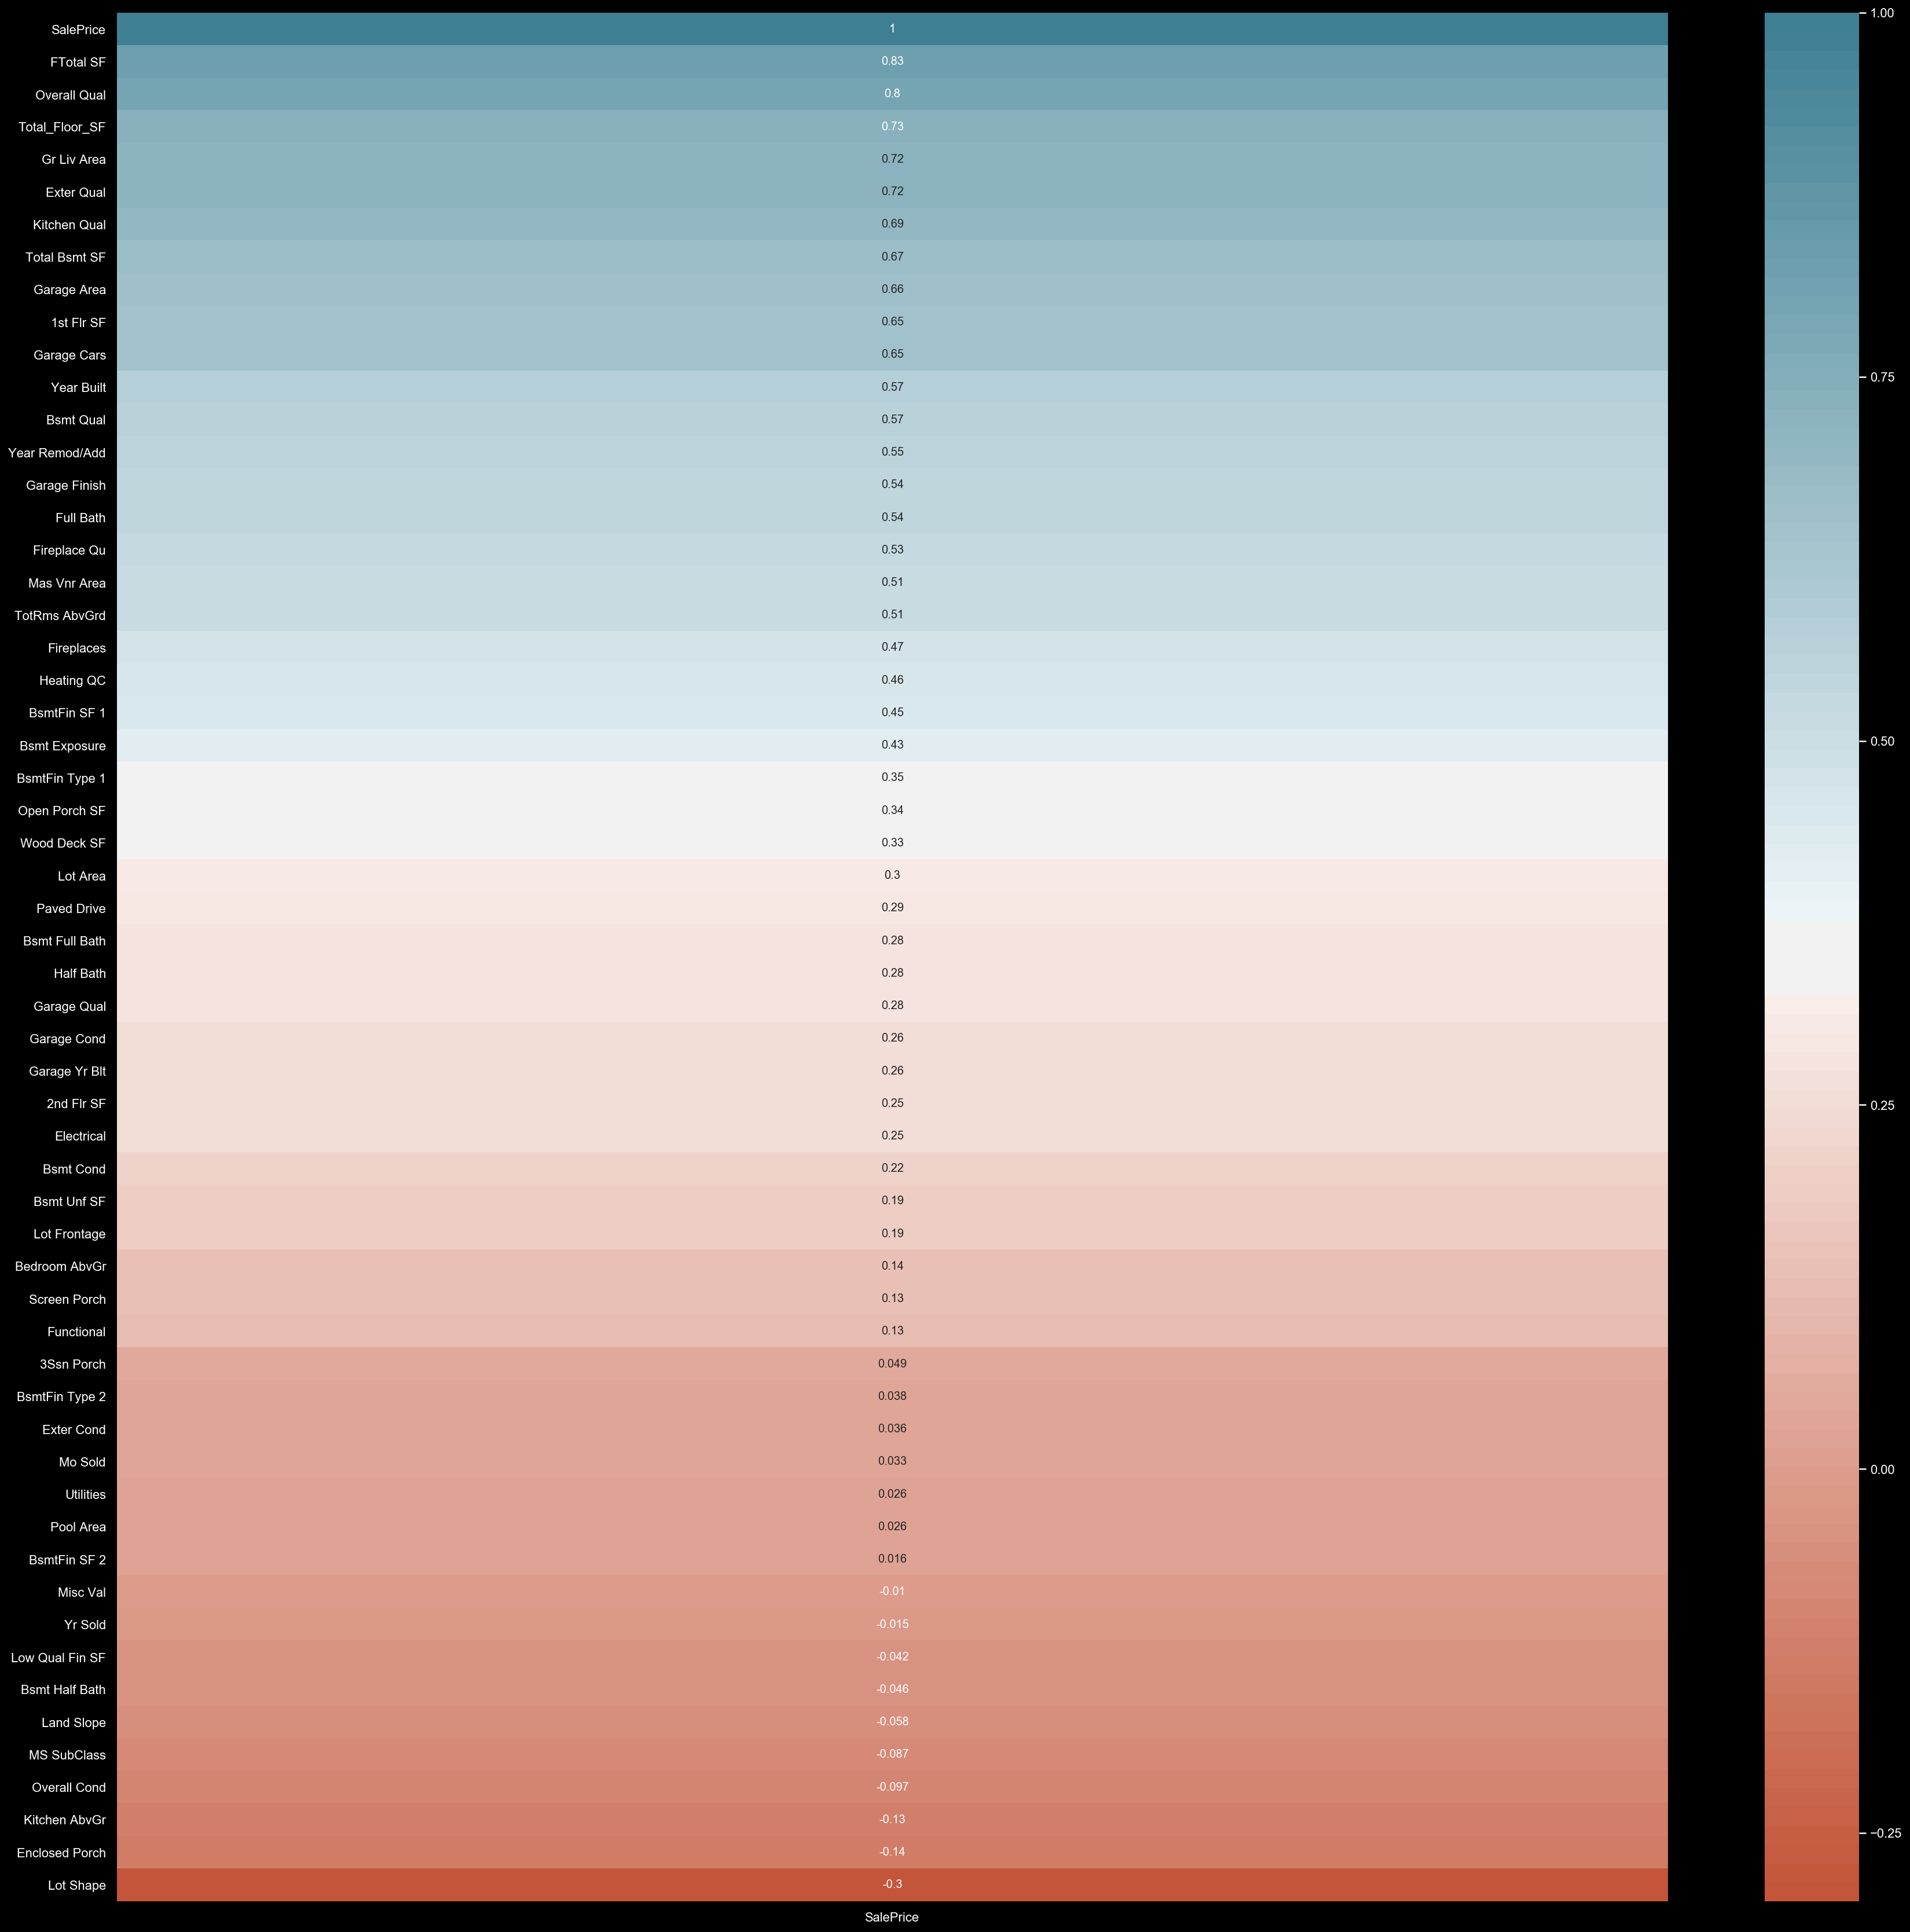

In [116]:
top_corr = train_updated.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)
plt.figure(figsize=(30,30))
sns.heatmap(top_corr, cmap=sns.diverging_palette(20,220,n=100),annot=True)

In [117]:
top_corr.head(30)

SalePrice
SalePrice        1.000000
FTotal SF        0.829925
Overall Qual     0.803462
Total_Floor_SF   0.728279
Gr Liv Area      0.719463
Exter Qual       0.715048
Kitchen Qual     0.694295
Total Bsmt SF    0.665116
Garage Area      0.655097
1st Flr SF       0.648252
Garage Cars      0.648227
Year Built       0.572405
Bsmt Qual        0.570779
Year Remod/Add   0.550872
Garage Finish    0.541040
Full Bath        0.538225
Fireplace Qu     0.532279
Mas Vnr Area     0.511273
TotRms AbvGrd    0.509775
Fireplaces       0.473783
Heating QC       0.458636
BsmtFin SF 1     0.446103
Bsmt Exposure    0.427780
BsmtFin Type 1   0.354273
Open Porch SF    0.338545
Wood Deck SF     0.327629
Lot Area         0.303744
Paved Drive      0.290528
Bsmt Full Bath   0.284433
Half Bath        0.283372

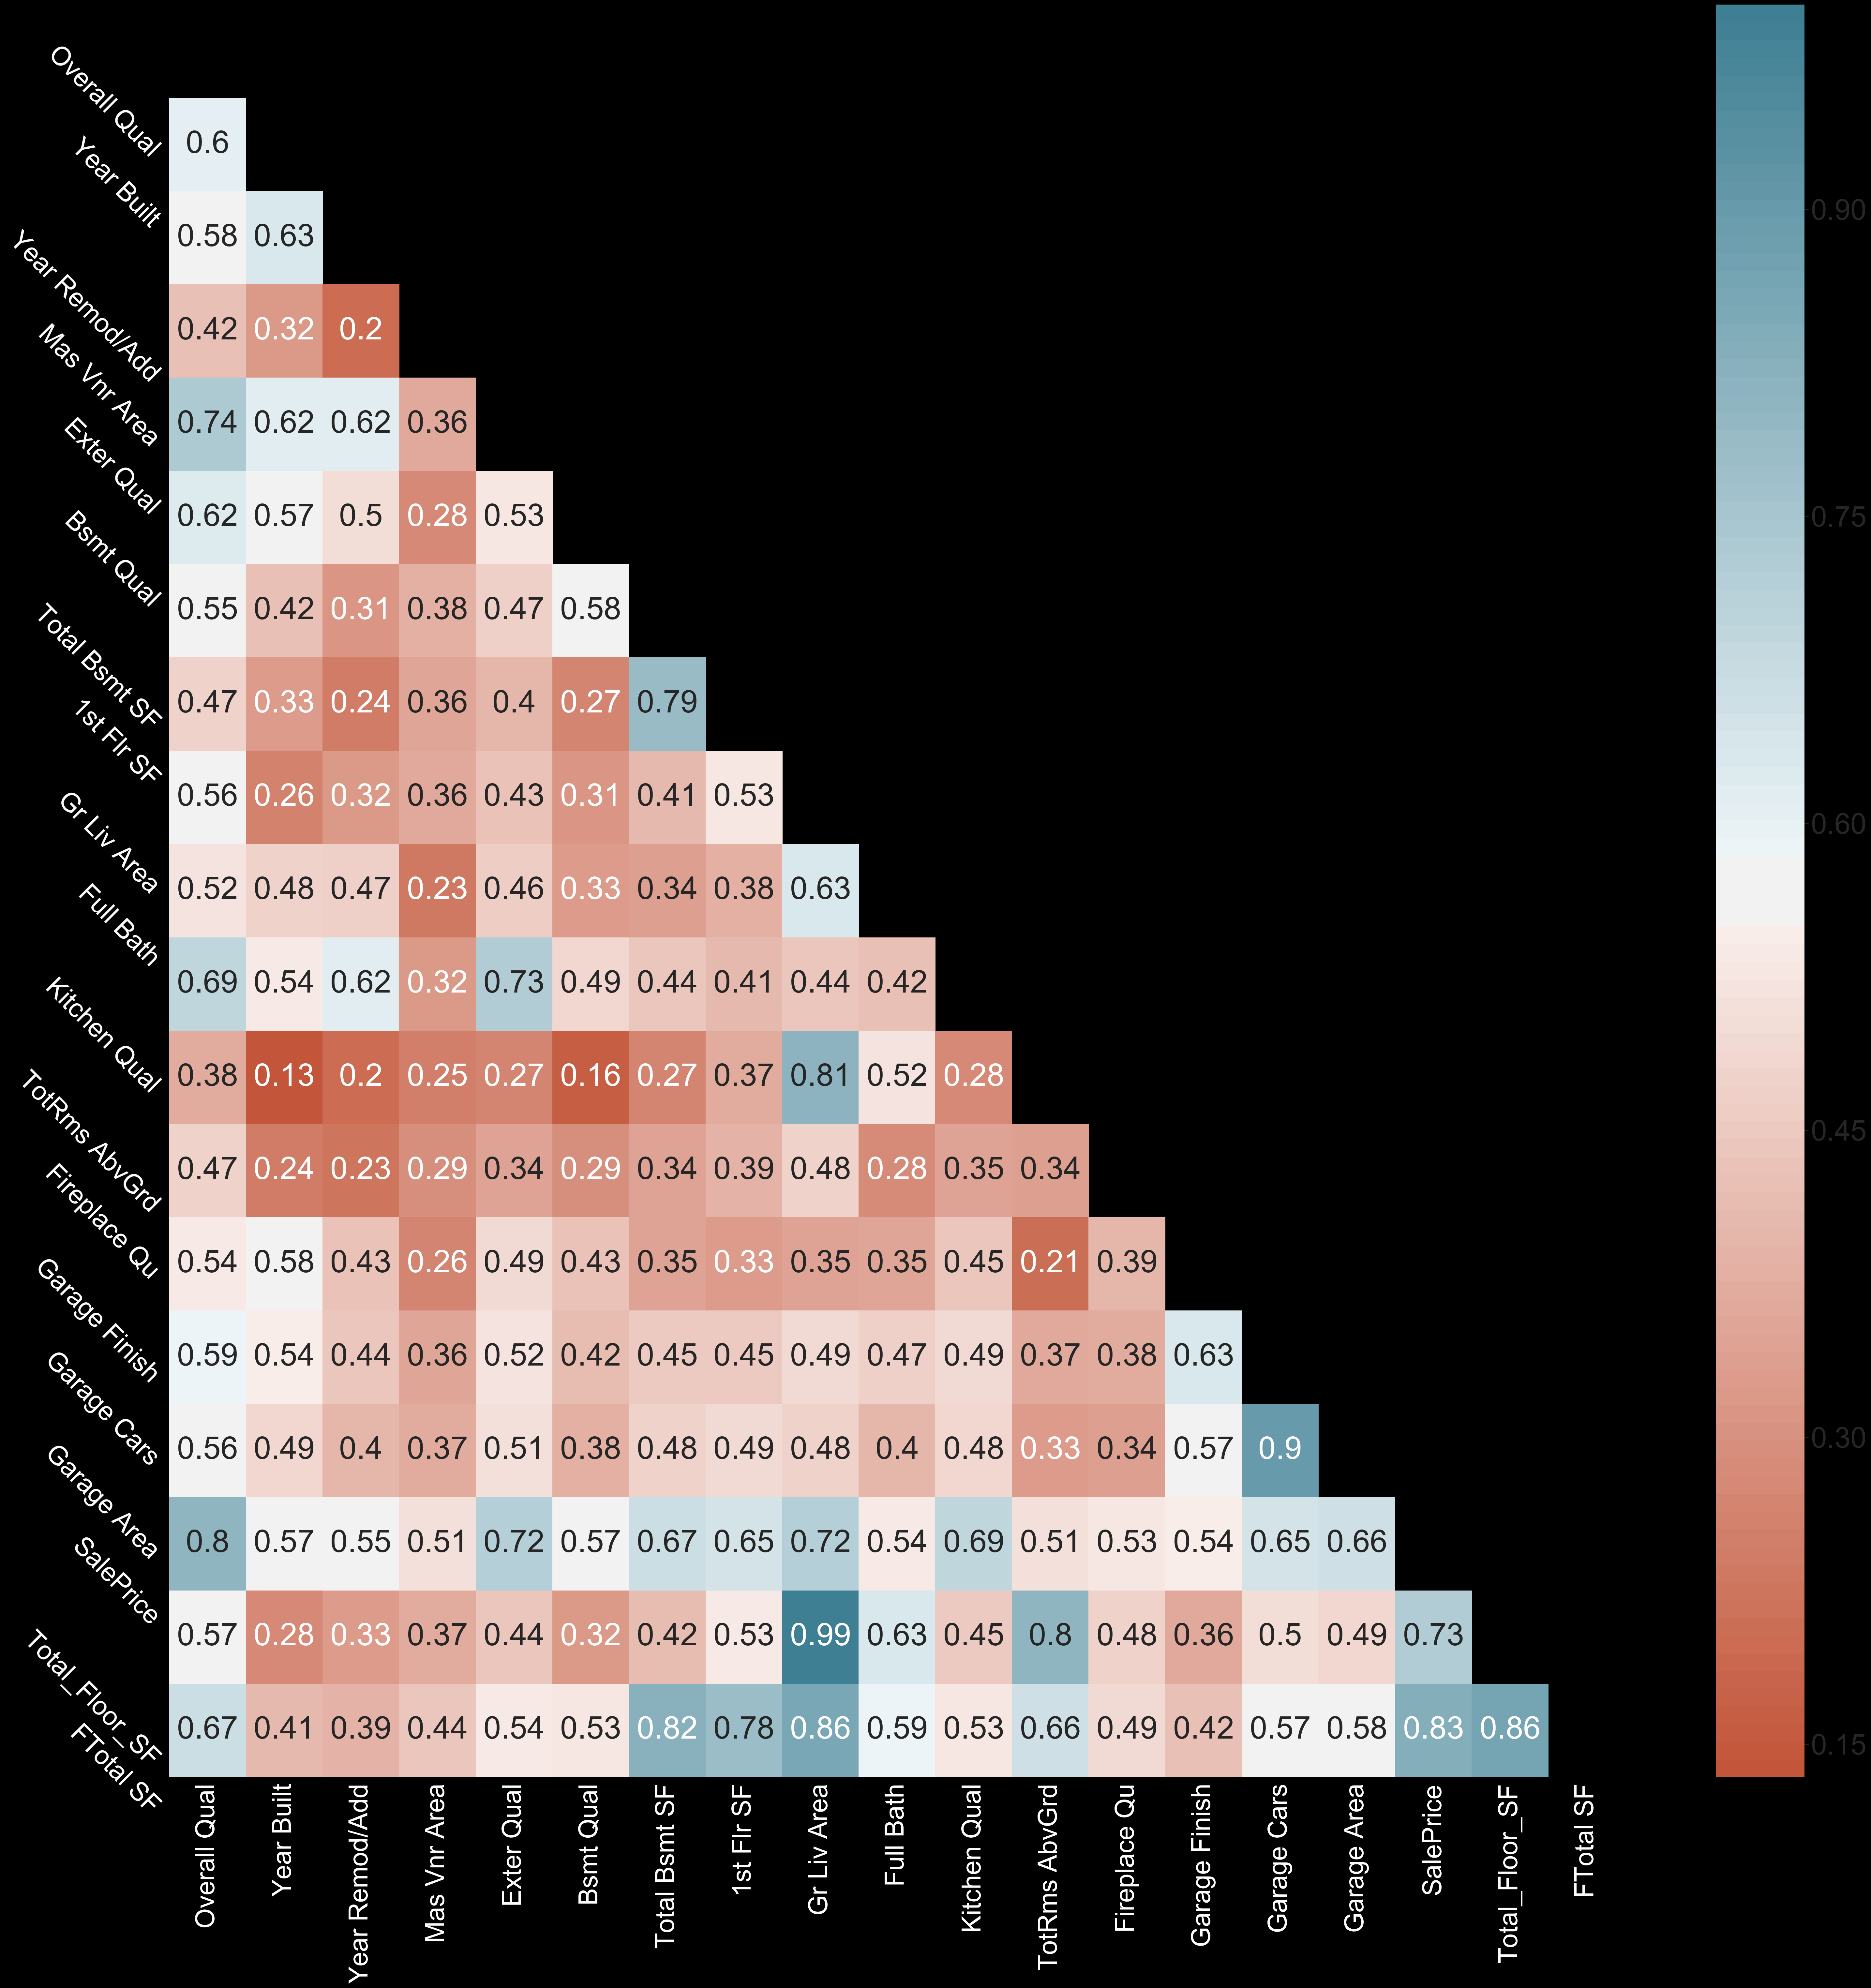

In [118]:
correlationsmat = train_updated.corr()
best_feat = correlationsmat.index[abs(correlationsmat["SalePrice"])>0.5]

fix, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=4)

# Generate a mask for the upper triangle
mask = np.zeros_like(train_updated[best_feat].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns.
ax = sns.heatmap(train_updated[best_feat].corr(), mask=mask, ax=ax, cmap=sns.diverging_palette(20,220,n=100), annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=40, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=40, rotation=-45)
# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.show()

In [119]:
train_updated.corr().index[abs(train_updated.corr()["SalePrice"])>0.25]

Index(['Lot Area', 'Lot Shape', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'Total_Floor_SF', 'FTotal SF'],
      dtype='object')

In [164]:
features_1 = top_corr['SalePrice'].iloc[1:31].index
train_modeling_1 = pd.concat([train_updated[features_1],train_model_nom.drop(columns = "SalePrice")], axis=1)

train_modeling_1.head()

FTotal SF  Overall Qual  Total_Floor_SF  Gr Liv Area  Exter Qual  \
Id                                                                      
109     2204.0             6            1479         1479           4   
544     3035.0             7            2122         2122           4   
153     2114.0             5            1057         1057           3   
318     1828.0             5            1444         1444           3   
255     2121.0             6            1445         1445           3   

     Kitchen Qual  Total Bsmt SF  Garage Area  1st Flr SF  Garage Cars  \
Id                                                                       
109             4          725.0        475.0         725          2.0   
544             4          913.0        559.0         913          2.0   
153             4         1057.0        246.0        1057          1.0   
318             3          384.0        400.0         744          2.0   
255             3          676.0        484.0         831          2.0   

     Year Built  Bsmt Qual  Year Remod/Add  Garage Finish  Full Bath  \
Id                                                                     
109        1976        4.0            2005            3.0          2   
544        1996        5.0            1997            3.0          2   
153        1953        4.0            2007            2.0          1   
318        2006        5.0            2007            4.0          2   
255        1900        3.0            1993            2.0          2   

     Fireplace Qu  Mas Vnr Area  TotRms AbvGrd  Fireplaces  Heating QC  \
Id                                                                       
109           0.0         289.0              6           0           5   
544           4.0         132.0              8           1           5   
153           0.0           0.0              5           0           3   
318           0.0           0.0              7           0           4   
255           0.0           0.0              6           0           3   

     BsmtFin SF 1  Bsmt Exposure  BsmtFin Type 1  Open Porch SF  Wood Deck SF  \
Id                                                                              
109         533.0            2.0             7.0             44             0   
544         637.0            2.0             7.0             74             0   
153         731.0            2.0             7.0             52             0   
318           0.0            2.0             2.0              0           100   
255           0.0            2.0             2.0             59             0   

     Lot Area  Paved Drive  Bsmt Full Bath  Half Bath  Garage Qual  \
Id                                                                   
109     13517            3             0.0          1          4.0   
544     11492            3             1.0          1          4.0   
153      7922            3             1.0          0          4.0   
318      9802            3             0.0          1          4.0   
255     14235            1             0.0          0          4.0   

     MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
Id                                                                      
109                  0             0                  0             0   
544                  0             0                  0             0   
153                  0             0                  0             0   
318                  0             0                  0             0   
255                  0             0                  0             0   

     MS Zoning_RL  MS Zoning_RM  Street_Pave  Neighborhood_Blueste  \
Id                                                                   
109             1             0            1                     0   
544             1             0            1                     0   
153             1             0            1                     0   
318             1            

In [123]:
# # drop variables with multi colinearity
# columns_to_drop=set(high_corrs[high_corrs["Correlations"]>0.8]["Attribute_1"]).union(set(low_corrs["Attribute_1"]))- {'Year Built',
#  'Year Remod/Add',
#  'Yr Sold','Utilities','Overall Cond',
#  'Overall Qual', 'SalePrice'}
# train_updated.drop(columns=list(columns_to_drop),inplace=True)
# train_updated

In [124]:
# further_cols_to_drop=['MS Zoning', 'Basement_SF_Cat', 'Floor_SF_Cat', 'Garage_SF_Cat', 'Sale Type', 'Condition 2','Land Contour', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','Central Air', 'Misc Feature']
# train_updated.drop(columns=further_cols_to_drop,inplace=True)
# train_updated

In [125]:
# # one-hot encoding for all categorical and continuous variables
# features = pd.concat([pd.get_dummies(train_updated[feat],prefix=feat) for feat in train_updated if train_updated[feat].dtype == 'O'], axis=1)


# Train Test Split

train_test_split is used to hold out a test set to understand how the model performs on data unseen. The model might fit the train dataset but not score well on the test dataset, which means that it might not perform well if there are new elements. 

In [127]:
X_1 = train_modeling_1
y_1 = train_updated['SalePrice']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, 
                                                    random_state=42,
                                                    test_size=0.2)

# Scale Data

using StandardScaler, fitting the scaler on the training dataset and transform both train and test datasets. 

In [132]:
# Standardize X_train and X_test using Standard Scaler

# Instantiate Standard Scaler
ss = StandardScaler()

# Fit Standard Scaler to X_train and transform X_train
X_train_sc_1 = ss.fit_transform(X_train_1)

# Transform X_test using Standard Scaler
X_test_sc_1 = ss.transform(X_test_1)

In [133]:
# instantiate the models
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [136]:
# r^2 score for the models
# Cross validation
lasso_score_1 = cross_val_score(lasso, X_train_sc_1, y_train_1, cv=10)
print("Lasso Regression Score :" + str(lasso_score_1.mean()))
lr_score_1 = cross_val_score(lr,X_train_sc_1,y_train_1,cv=10)
print("Linear Regression Score :" + str(lr_score_1.mean()))
ridge_score_1 = cross_val_score(ridge, X_train_sc_1, y_train_1, cv=10)
print("Ridge Regression Score :" + str(ridge_score_1.mean()))


Lasso Regression Score :0.8706653220926805
Linear Regression Score :0.8702472865798792
Ridge Regression Score :0.8707067586976226


In [138]:
# lasso fitting the model to training data
lasso.fit(X_train_sc_1, y_train_1)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [139]:
# Training Data Score
lasso.score(X_train_sc_1, y_train_1)

0.8801025406356792

In [140]:
# Testing Data Score
lasso.score(X_test_sc_1, y_test_1)

0.8720217804445614

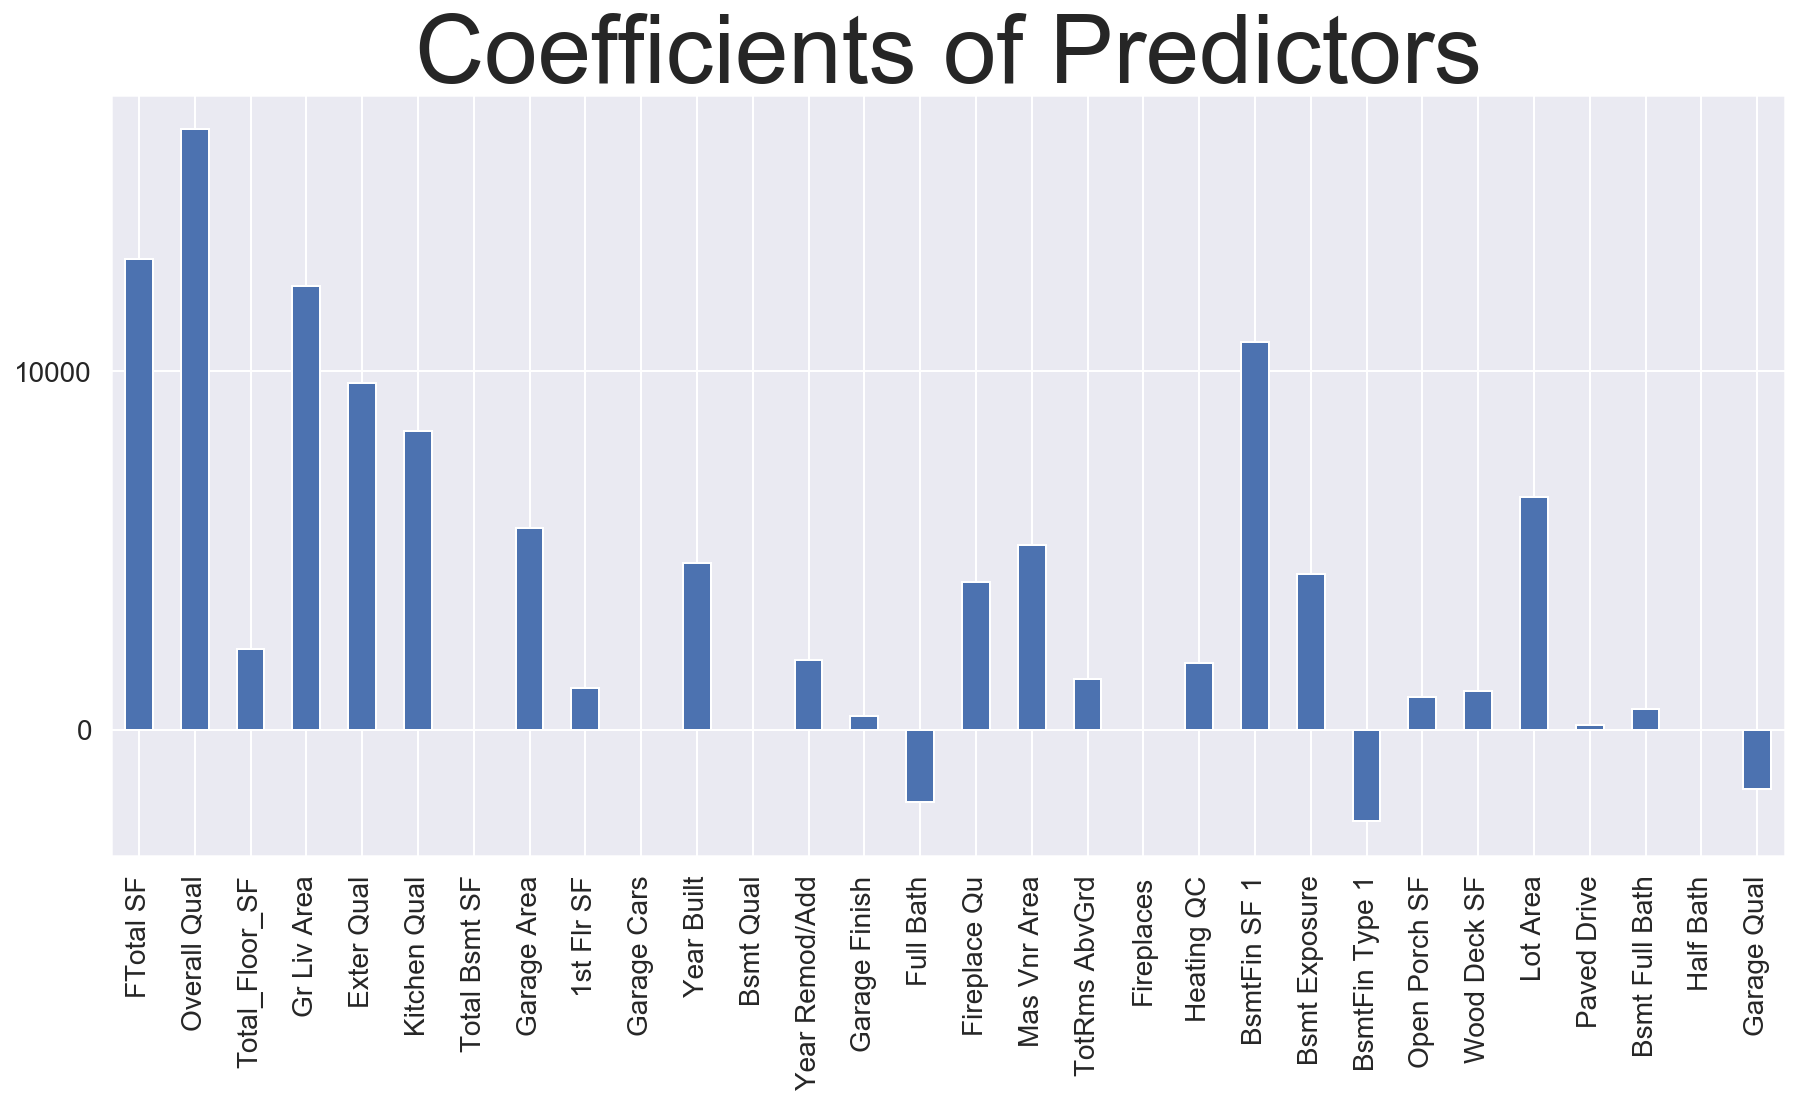

In [151]:
# Barplot to see how each coefficient of the variables relate to the SalesPrice

pd.Series(lasso.coef_, index=features_1).plot.bar(figsize=(15, 7))
# plt.rcParams.update({'font.size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Coefficients of Predictors')
plt.savefig('./images/lassocoef.png')

In [153]:
# multicollinearity(X_1)

In [154]:
# looking for multicollinearity 
correlations = train_updated.corr()
cut_off = 0.7
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep ='first')
high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

In [ ]:
high_corrs.columns

In [156]:
low_corrs = correlations[correlations.abs() <= cut_off].unstack().dropna().to_dict()
low_corrs = pd.Series(low_corrs, index = low_corrs.keys())
low_corrs = low_corrs.reset_index()
low_corrs = pd.DataFrame(low_corrs)
low_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
low_corrs['Correlations'] = low_corrs['Correlations'].drop_duplicates(keep ='first')
low_corrs = low_corrs.dropna().sort_values(by = 'Correlations', ascending = False)

In [ ]:
low_corrs.columns

In [157]:
train_updated.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [167]:
#final model 
train_model_final = train_modeling_1.drop(columns=['Garage Cars','TotRms AbvGrd','1st Flr SF','Exter Qual','Garage Type_Attchd','Paved Drive','Central Air_Y','House Style_2Story'])


In [168]:
X_final = train_model_final
y_final = train_updated['SalePrice']
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, 
                                                    random_state=42,
                                                    test_size=0.2)

In [169]:
# Fit Standard Scaler to X_train and transform X_train
X_train_sc_final = ss.fit_transform(X_train_final)

# Transform X_test using Standard Scaler
X_test_sc_final = ss.transform(X_test_final)

In [170]:
# r^2 score for the models
# Cross validation
lasso_score_final = cross_val_score(lasso, X_train_sc_final, y_train_final, cv=10)
print("Lasso Regression Score :" + str(lasso_score_final.mean()))
lr_score_final = cross_val_score(lr,X_train_sc_final,y_train_final,cv=10)
print("Linear Regression Score :" + str(lr_score_final.mean()))
ridge_score_final = cross_val_score(ridge, X_train_sc_final, y_train_final, cv=10)
print("Ridge Regression Score :" + str(ridge_score_final.mean()))


Lasso Regression Score :0.8858268584362181
Linear Regression Score :-5.566511389410583e+22
Ridge Regression Score :0.8829629904510499


Obviously lr will not be considered. Between Lasso and Ridge, Ridge is a better predictor even though the R2 Score is marginly lesser than that of Lasso. The reason is that practically Ridge is preferred. Lasso is just to refine and filter the low-correlated features. 

In [171]:
#Fitting the model to training data
ridge.fit(X_train_sc_final, y_train_final)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [172]:
# training Score
ridge.score(X_train_sc_final, y_train_final)

0.9062057046836332

In [173]:
# testing Data Score
ridge.score(X_test_sc_final, y_test_final)

0.8906529332841611

the score difference is very small - 0.1 so the model prediction is fine! Somewhat accurate:) 

In [174]:
# Make predictions using the testing set
y_pred = ridge.predict(X_test_sc_final)

In [176]:
residuals_final = y_test_final - y_pred

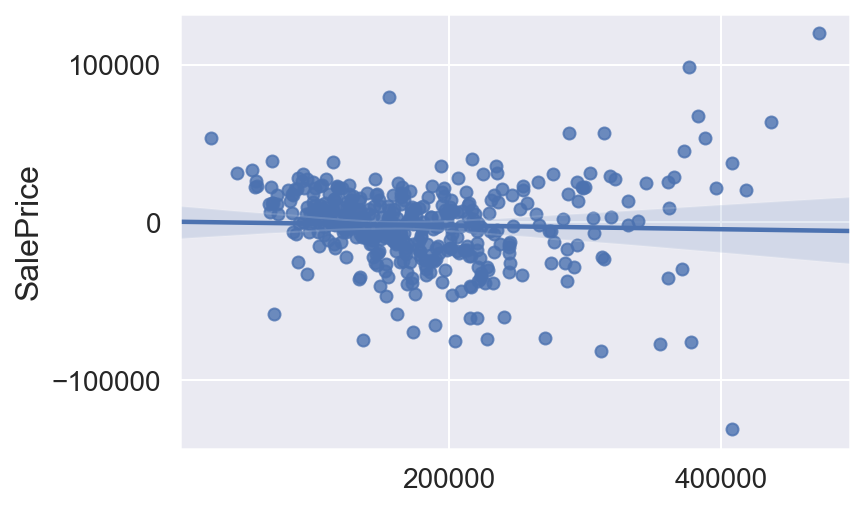

In [184]:
sns.regplot(y_pred,residuals_final)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=18)
plt.ylabel('SalePrice', fontsize=16)
plt.savefig('./images/coeffinal.png')

there is an even spread of predicted vs residuals, there are some outliers though

In [185]:
rmse_final = np.sqrt(mean_squared_error(y_test_final, y_pred))
rmse_final

25539.267462207925

# Round 2

In [188]:
train_model_nom_2 = pd.get_dummies(train_model_nom, drop_first=True)
train_model_nom_2

SalePrice  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
Id                                                                    
109      130500                  0             0                  0   
544      220000                  0             0                  0   
153      109000                  0             0                  0   
318      174000                  0             0                  0   
255      138500                  0             0                  0   
...         ...                ...           ...                ...   
1587     298751                  0             0                  0   
785       82500                  0             0                  0   
916      177000                  0             0                  0   
639      144000                  0             0                  0   
10       189000                  0             0                  0   

      MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Pave  \
Id                                                            
109              0             1             0            1   
544              0             1             0            1   
153              0             1             0            1   
318              0             1             0            1   
255              0             1             0            1   
...            ...           ...           ...          ...   
1587             0             1             0            1   
785              0             1             0            1   
916              0             1             0            1   
639              0             1             0            1   
10               0             1             0            1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
Id                                                                      
109                      0                    0                     0   
544                      0                    0                     0   
153                      0                    0                     0   
318                      0                    0                     0   
255                      0                    0                     0   
...                    ...                  ...                   ...   
1587                     0                    0                     0   
785                      0                    0                     0   
916                      0                    0                     0   
639                      0                    0                     0   
10                       0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
Id                                                                       
109                      0                     0                     0   
544                      0                     0                     0   
153                      0                     0                     0   
318                      0                     0                     0   
255                      0                     0                     0   
...                    ...                   ...                   ...   
1587                     0                     0                     0   
785                      0                     0                     0   
916                      0                     0                     1   
639                      0                     0                     0   
10                       0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
Id                                                                      
109                      0                     0                    0   
544                      0                     0                    0   
153                      0                     0         

In [194]:
train_modeling_2 = pd.concat([train_updated[features_1],train_model_nom_2], axis=1)
train_modeling_2

FTotal SF  Overall Qual  Total_Floor_SF  Gr Liv Area  Exter Qual  \
Id                                                                       
109      2204.0             6            1479         1479           4   
544      3035.0             7            2122         2122           4   
153      2114.0             5            1057         1057           3   
318      1828.0             5            1444         1444           3   
255      2121.0             6            1445         1445           3   
...         ...           ...             ...          ...         ...   
1587     3612.0             8            1728         1728           4   
785      1722.0             4             861          861           3   
916      2809.0             6            1913         1913           3   
639      2400.0             4            1200         1200           3   
10       2798.0             7            1804         1804           3   

      Kitchen Qual  Total Bsmt SF  Garage Area  1st Flr SF  Garage Cars  \
Id                                                                        
109              4          725.0        475.0         725          2.0   
544              4          913.0        559.0         913          2.0   
153              4         1057.0        246.0        1057          1.0   
318              3          384.0        400.0         744          2.0   
255              3          676.0        484.0         831          2.0   
...            ...            ...          ...         ...          ...   
1587             4         1884.0        520.0        1728          2.0   
785              3          861.0        539.0         861          2.0   
916              3          896.0        342.0        1172          2.0   
639              3         1200.0        294.0        1200          1.0   
10               4          994.0        442.0        1028          2.0   

      Year Built  Bsmt Qual  Year Remod/Add  Garage Finish  Full Bath  \
Id                                                                      
109         1976        4.0            2005            3.0          2   
544         1996        5.0            1997            3.0          2   
153         1953        4.0            2007            2.0          1   
318         2006        5.0            2007            4.0          2   
255         1900        3.0            1993            2.0          2   
...          ...        ...             ...            ...        ...   
1587        2007        5.0            2007            4.0          2   
785         1940        4.0            1950            2.0          1   
916         1928        4.0            1950            2.0          1   
639         1956        4.0            1956            2.0          1   
10          1999        4.0            1999            4.0          2   

      Fireplace Qu  Mas Vnr Area  TotRms AbvGrd  Fireplaces  Heating QC  \
Id                                                                        
109            0.0         289.0              6           0           5   
544            4.0         132.0              8           1           5   
153            0.0           0.0              5           0           3   
318            0.0           0.0              7           0           4   
255            0.0           0.0              6           0           3   
...            ...           ...            ...         ...         ...   
1587           5.0           0.0              7           1           5   
785            0.0           0.0              4           0           5   
916            4.0           0.0              9           1           4   
639            5.0           0.0              6           2           3   
10             4.0           0.0              7           1           4   

      BsmtFin SF 1  Bsmt Exposure  BsmtFin Type 1  Open Porch SF  \
Id                                                                 
109  

In [204]:
features_2 = train_modeling_2.drop(columns = "SalePrice").columns
X_2 = train_modeling_2.drop(columns = "SalePrice")
y_2 = train_modeling_2["SalePrice"]

X_sc_2 = ss.fit_transform(X_2)

In [205]:
lasso.fit(X_sc_2,y_2)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [206]:
lasso_coefs = pd.DataFrame({'variable':X_2.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(25)

variable          coef      abs_coef
1            Overall Qual  14126.546679  14126.546679
3             Gr Liv Area  11261.945713  11261.945713
0               FTotal SF  11211.608616  11211.608616
20           BsmtFin SF 1  10177.465911  10177.465911
55   Neighborhood_NridgHt   6785.109066   6785.109066
5            Kitchen Qual   6059.393079   6059.393079
4              Exter Qual   5975.414721   5975.414721
7             Garage Area   5859.726882   5859.726882
106         Sale Type_New   5772.848718   5772.848718
61   Neighborhood_StoneBr   5651.258320   5651.258320
25               Lot Area   5021.935131   5021.935131
16           Mas Vnr Area   4379.211444   4379.211444
2          Total_Floor_SF   4117.860900   4117.860900
21          Bsmt Exposure   4036.643811   4036.643811
54   Neighborhood_NoRidge   3413.044540   3413.044540
42   Neighborhood_Crawfor   2806.791922   2806.791922
46   Neighborhood_GrnHill   2747.510690   2747.510690
12         Year Remod/Add   2467.222213   2467.222213
19             Heating QC   2238.621921   2238.621921
35           MS Zoning_RM  -2087.980312   2087.980312
65       Condition 1_Norm   1947.724292   1947.724292
18             Fireplaces   1764.056051   1764.056051
67       Condition 1_PosN   1748.932716   1748.932716
10             Year Built   1701.082367   1701.082367
89      Roof Matl_WdShngl   1697.913480   1697.913480

In [212]:
correlations_2 = X_2.corr()
high_corrs_2 = correlations[correlations_2.abs() > cut_off][correlations_2.abs() != 1].unstack().dropna().to_dict()
high_corrs_2 = pd.Series(high_corrs_2, index = high_corrs_2.keys())
high_corrs_2 = high_corrs_2.reset_index()
high_corrs_2 = pd.DataFrame(high_corrs_2)
high_corrs_2.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs_2['Correlations'] = high_corrs_2['Correlations'].drop_duplicates(keep ='first')
high_corrs_2 = high_corrs_2.dropna().sort_values(by = 'Correlations', ascending = False)
high_corrs_2

Attribute_1     Attribute_2  Correlations
115     Gr Liv Area  Total_Floor_SF      0.994454
166  Total_Floor_SF       FTotal SF      0.861887
116     Gr Liv Area       FTotal SF      0.855667
103      1st Flr SF       FTotal SF      0.777534
8      Overall Qual      Exter Qual      0.738370
61       Exter Qual    Kitchen Qual      0.729048
14     Overall Qual    Kitchen Qual      0.688878
18     Overall Qual       FTotal SF      0.670147
20       Year Built  Year Remod/Add      0.628613
38   Year Remod/Add    Kitchen Qual      0.617039
34   Year Remod/Add      Exter Qual      0.616728
22       Year Built      Exter Qual      0.615905
5      Overall Qual      Year Built      0.602376
6      Overall Qual  Year Remod/Add      0.584080
153     Garage Area       FTotal SF      0.575397
17     Overall Qual  Total_Floor_SF      0.573926
13     Overall Qual     Gr Liv Area      0.564933
36   Year Remod/Add      Heating QC      0.563326
16     Overall Qual     Garage Area      0.559897
64       Exter Qual       FTotal SF      0.540265
28       Year Built    Kitchen Qual      0.536293
102      1st Flr SF  Total_Floor_SF      0.534573
98       1st Flr SF     Gr Liv Area      0.530279
129    Kitchen Qual       FTotal SF      0.528489
58       Exter Qual      Heating QC      0.525564
87       Heating QC    Kitchen Qual      0.512565
62       Exter Qual     Garage Area      0.509257
101      1st Flr SF     Garage Area      0.489472
152     Garage Area  Total_Floor_SF      0.488914
29       Year Built     Garage Area      0.487414
127    Kitchen Qual     Garage Area      0.481033
114     Gr Liv Area     Garage Area      0.478456
11     Overall Qual      Heating QC      0.475135
12     Overall Qual      1st Flr SF      0.474783
139      Fireplaces       FTotal SF      0.465453
25       Year Built      Heating QC      0.463232
138      Fireplaces  Total_Floor_SF      0.454121
113     Gr Liv Area      Fireplaces      0.451190
128    Kitchen Qual  Total_Floor_SF      0.448952
52     Mas Vnr Area       FTotal SF      0.443687
112     Gr Liv Area    Kitchen Qual      0.441672
63       Exter Qual  Total_Floor_SF      0.440663
60       Exter Qual     Gr Liv Area      0.428921
7      Overall Qual    Mas Vnr Area      0.423650
78     BsmtFin SF 1      1st Flr SF      0.412627
31       Year Built       FTotal SF      0.408616
99       1st Flr SF    Kitchen Qual      0.405458
59       Exter Qual      1st Flr SF      0.401464
39   Year Remod/Add     Garage Area      0.396578
69    Bsmt Exposure    BsmtFin SF 1      0.394722
100      1st Flr SF      Fireplaces      0.386505
41   Year Remod/Add       FTotal SF      0.385219
15     Overall Qual      Fireplaces      0.384147
81     BsmtFin SF 1       FTotal SF      0.376998
9      Overall Qual   Bsmt Exposure      0.373349
50     Mas Vnr Area     Garage Area      0.369940
51     Mas Vnr Area  Total_Floor_SF      0.369475
47     Mas Vnr Area     Gr Liv Area      0.360762
44     Mas Vnr Area      Exter Qual      0.359504
46     Mas Vnr Area      1st Flr SF      0.358599
73    Bsmt Exposure       FTotal SF      0.349376
0          Lot Area      1st Flr SF      0.348123
40   Year Remod/Add  Total_Floor_SF      0.332554
90       Heating QC       FTotal SF      0.332131
26       Year Built      1st Flr SF      0.326977
37   Year Remod/Add     Gr Liv Area      0.323532
21       Year Built    Mas Vnr Area      0.319393
48     Mas Vnr Area    Kitchen Qual      0.317940
70    Bsmt Exposure      1st Flr SF      0.316171
4          Lot Area       FTotal SF      0.315563
57       Exter Qual   Bsmt Exposure      0.315068
88       Heating QC     Garage Area      0.312294
80     BsmtFin SF 1     Garage Area      0.311994
23       Year Built   Bsmt Exposure      0.310581
3          Lot Area  Total_Floor_SF      0.296141
71    Bsmt Exposure    Kitchen Qual      0.294616
1          Lot Area     Gr Liv Area      0.294542
45     Mas Vnr Area    BsmtFin SF 1      0.289811
89       Heating QC  Total_Floor_SF      0.285239
79     B

In [217]:
features_3 = lasso_coefs["variable"].iloc[:26]

In [218]:
X_3 = train_modeling_2[features_3]
y_3 = train_modeling_2["SalePrice"]

In [220]:
X_3 = X_3.drop(columns=['Exter Qual'])
features_3 = X_3.columns

In [223]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state = 42)

X_train_sc_3 = ss.fit_transform(X_train_3)
X_test_sc_3 = ss.transform(X_test_3)

In [224]:
lasso_score_3 = cross_val_score(lasso, X_train_sc_3, y_train_3, cv=10)
print("Lasso Regression Score :" + str(lasso_score_3.mean()))
lr_score_3 = cross_val_score(lr,X_train_sc_3,y_train_3,cv=10)
print("Linear Regression Score :" + str(lr_score_3.mean()))
ridge_score_3 = cross_val_score(ridge, X_train_sc_3, y_train_3, cv=10)
print("Ridge Regression Score :" + str(ridge_score_3.mean()))

Lasso Regression Score :0.88486580687799
Linear Regression Score :0.8767922846813981
Ridge Regression Score :0.8858063591381796


In [225]:
# since Ridge Regression is preferred

ridge3 = ridge.fit(X_train_sc_3, y_train_3)


In [227]:
#scoring of training and testing data

print('Ridge Score of Train Data: ' , ridge.score(X_train_sc_3,y_train_3))
print('Ridge Score of Test Data: ' , ridge.score(X_test_sc_3,y_test_3))

Ridge Score of Train Data:  0.8968499283027566
Ridge Score of Test Data:  0.8893507260968551


In [228]:
y_pred_3 = ridge.predict(X_test_sc_3)

In [229]:
residuals_3 = y_test_3 - y_pred_3

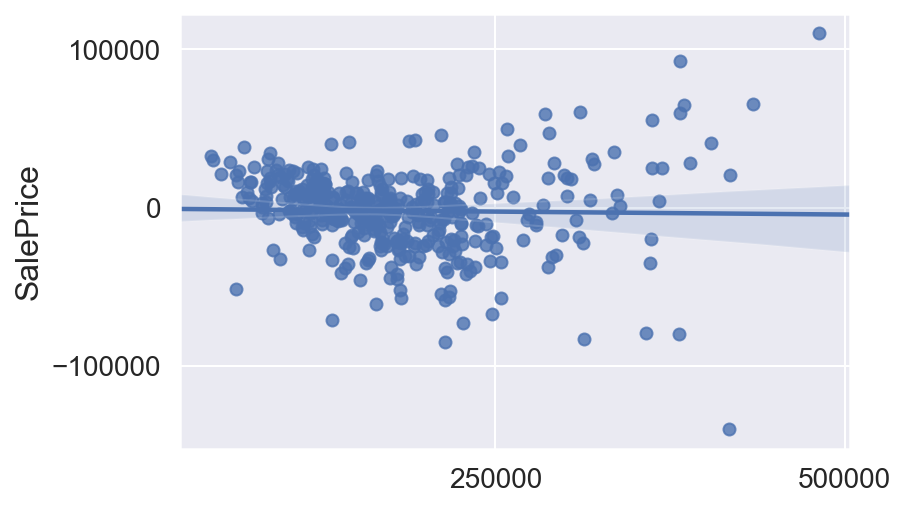

In [230]:
sns.regplot(y_pred_3,residuals_3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=18)
plt.ylabel('SalePrice', fontsize=16)
plt.savefig('./images/coef3.png')

In [231]:
rmse_3 = np.sqrt(mean_squared_error(y_test_3, y_pred_3))
rmse_3

25690.890129197694

# Round 3

In [267]:
train_modeling_3 = pd.concat([train_updated[features_1],train_model_nom_2], axis=1)
train_modeling_3

FTotal SF  Overall Qual  Total_Floor_SF  Gr Liv Area  Exter Qual  \
Id                                                                       
109      2204.0             6            1479         1479           4   
544      3035.0             7            2122         2122           4   
153      2114.0             5            1057         1057           3   
318      1828.0             5            1444         1444           3   
255      2121.0             6            1445         1445           3   
...         ...           ...             ...          ...         ...   
1587     3612.0             8            1728         1728           4   
785      1722.0             4             861          861           3   
916      2809.0             6            1913         1913           3   
639      2400.0             4            1200         1200           3   
10       2798.0             7            1804         1804           3   

      Kitchen Qual  Total Bsmt SF  Garage Area  1st Flr SF  Garage Cars  \
Id                                                                        
109              4          725.0        475.0         725          2.0   
544              4          913.0        559.0         913          2.0   
153              4         1057.0        246.0        1057          1.0   
318              3          384.0        400.0         744          2.0   
255              3          676.0        484.0         831          2.0   
...            ...            ...          ...         ...          ...   
1587             4         1884.0        520.0        1728          2.0   
785              3          861.0        539.0         861          2.0   
916              3          896.0        342.0        1172          2.0   
639              3         1200.0        294.0        1200          1.0   
10               4          994.0        442.0        1028          2.0   

      Year Built  Bsmt Qual  Year Remod/Add  Garage Finish  Full Bath  \
Id                                                                      
109         1976        4.0            2005            3.0          2   
544         1996        5.0            1997            3.0          2   
153         1953        4.0            2007            2.0          1   
318         2006        5.0            2007            4.0          2   
255         1900        3.0            1993            2.0          2   
...          ...        ...             ...            ...        ...   
1587        2007        5.0            2007            4.0          2   
785         1940        4.0            1950            2.0          1   
916         1928        4.0            1950            2.0          1   
639         1956        4.0            1956            2.0          1   
10          1999        4.0            1999            4.0          2   

      Fireplace Qu  Mas Vnr Area  TotRms AbvGrd  Fireplaces  Heating QC  \
Id                                                                        
109            0.0         289.0              6           0           5   
544            4.0         132.0              8           1           5   
153            0.0           0.0              5           0           3   
318            0.0           0.0              7           0           4   
255            0.0           0.0              6           0           3   
...            ...           ...            ...         ...         ...   
1587           5.0           0.0              7           1           5   
785            0.0           0.0              4           0           5   
916            4.0           0.0              9           1           4   
639            5.0           0.0              6           2           3   
10             4.0           0.0              7           1           4   

      BsmtFin SF 1  Bsmt Exposure  BsmtFin Type 1  Open Porch SF  \
Id                                                                 
109  

In [268]:
train_modeling_3['Overalls'] = train_updated['Overall Qual'] * train_updated['Overall Cond'] 
train_modeling_3['Externals'] = train_updated['Exter Qual'] * train_updated['Exter Cond'] 
train_modeling_3['Basements'] = train_updated['Bsmt Qual'] * train_updated['Bsmt Cond'] 
train_modeling_3['Garage'] = train_updated['Garage Qual'] * train_updated['Garage Cond'] 
train_modeling_3['Kitchen'] = train_updated['Kitchen Qual'] * train_updated['Kitchen AbvGr'] 
# to include the FTotal SF


In [274]:
train_modeling_3["SalePrice"]

Id
109     130500
544     220000
153     109000
318     174000
255     138500
         ...  
1587    298751
785      82500
916     177000
639     144000
10      189000
Name: SalePrice, Length: 2049, dtype: int64

In [270]:
train_modeling_3 = train_modeling_3.drop(columns = ['Overall Qual','Exter Qual','Bsmt Qual','Bsmt Full Bath','Full Bath','Half Bath', 'Kitchen Qual', 'Fireplaces', 'Fireplace Qu', 'Garage Qual', 'Total Bsmt SF', 'Garage Area'])




In [271]:
train_modeling_3 = pd.get_dummies(train_modeling_3)

In [272]:
correlations_3 = train_modeling_3.corr()
high_corrs_3 = correlations[correlations_3.abs() > cut_off][correlations_3.abs() != 1].unstack().dropna().to_dict()
high_corrs_3 = pd.Series(high_corrs_3, index = high_corrs_3.keys())
high_corrs_3 = high_corrs_3.reset_index()
high_corrs_3 = pd.DataFrame(high_corrs_3)
high_corrs_3.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs_3['Correlations'] = high_corrs_3['Correlations'].drop_duplicates(keep ='first')
high_corrs_3 = high_corrs_3.dropna().sort_values(by = 'Correlations', ascending = False)
high_corrs_3

Attribute_1     Attribute_2  Correlations
99      Gr Liv Area  Total_Floor_SF      0.994454
182  Total_Floor_SF       FTotal SF      0.861887
100     Gr Liv Area       FTotal SF      0.855667
168       SalePrice       FTotal SF      0.829925
93      Gr Liv Area   TotRms AbvGrd      0.812129
106   TotRms AbvGrd  Total_Floor_SF      0.804019
86       1st Flr SF       FTotal SF      0.777534
167       SalePrice  Total_Floor_SF      0.728279
98      Gr Liv Area       SalePrice      0.719463
53   BsmtFin Type 1    BsmtFin SF 1      0.718484
107   TotRms AbvGrd       FTotal SF      0.656175
84       1st Flr SF       SalePrice      0.648252
133     Garage Cars       SalePrice      0.648227
117   Garage Finish     Garage Cars      0.631008
5        Year Built  Year Remod/Add      0.628613
13       Year Built   Garage Finish      0.576340
16       Year Built       SalePrice      0.572405
135     Garage Cars       FTotal SF      0.568214
22   Year Remod/Add      Heating QC      0.563326
27   Year Remod/Add       SalePrice      0.550872
14       Year Built     Garage Cars      0.542936
119   Garage Finish       SalePrice      0.541040
85       1st Flr SF  Total_Floor_SF      0.534573
80       1st Flr SF     Gr Liv Area      0.530279
37     Mas Vnr Area       SalePrice      0.511273
105   TotRms AbvGrd       SalePrice      0.509775
134     Garage Cars  Total_Floor_SF      0.504936
95      Gr Liv Area     Garage Cars      0.493368
10       Year Built      Heating QC      0.463232
72       Heating QC       SalePrice      0.458636
83       1st Flr SF     Garage Cars      0.450215
15       Year Built     Paved Drive      0.446877
65     BsmtFin SF 1       SalePrice      0.446103
39     Mas Vnr Area       FTotal SF      0.443687
25   Year Remod/Add     Garage Cars      0.439853
24   Year Remod/Add   Garage Finish      0.429767
48    Bsmt Exposure       SalePrice      0.427780
121   Garage Finish       FTotal SF      0.421671
62     BsmtFin SF 1      1st Flr SF      0.412627
18       Year Built       FTotal SF      0.408616
42    Bsmt Exposure  BsmtFin Type 1      0.396359
43    Bsmt Exposure    BsmtFin SF 1      0.394722
29   Year Remod/Add       FTotal SF      0.385219
66     BsmtFin SF 1       FTotal SF      0.376998
8        Year Built  BsmtFin Type 1      0.373415
81       1st Flr SF   TotRms AbvGrd      0.371375
70       Heating QC   Garage Finish      0.370771
118   Garage Finish     Paved Drive      0.369481
38     Mas Vnr Area  Total_Floor_SF      0.369475
104   TotRms AbvGrd     Garage Cars      0.367158
120   Garage Finish  Total_Floor_SF      0.360963
33     Mas Vnr Area     Gr Liv Area      0.360762
32     Mas Vnr Area      1st Flr SF      0.358599
36     Mas Vnr Area     Garage Cars      0.356357
56   BsmtFin Type 1       SalePrice      0.354273
49    Bsmt Exposure       FTotal SF      0.349376
0          Lot Area      1st Flr SF      0.348123
94      Gr Liv Area   Garage Finish      0.346777
71       Heating QC     Garage Cars      0.340586
148   Open Porch SF       SalePrice      0.338545
28   Year Remod/Add  Total_Floor_SF      0.332554
74       Heating QC       FTotal SF      0.332131
150   Open Porch SF       FTotal SF      0.328644
143    Wood Deck SF       SalePrice      0.327629
11       Year Built      1st Flr SF      0.326977
82       1st Flr SF   Garage Finish      0.326241
149   Open Porch SF  Total_Floor_SF      0.323712
23   Year Remod/Add     Gr Liv Area      0.323532
97      Gr Liv Area   Open Porch SF      0.321129
6        Year Built    Mas Vnr Area      0.319393
44    Bsmt Exposure      1st Flr SF      0.316171
4          Lot Area       FTotal SF      0.315563
7        Year Built   Bsmt Exposure      0.310581
2          Lot Area       SalePrice      0.303744
132     Garage Cars     Paved Drive      0.302063
3          Lot Area  Total_Floor_SF      0.296141
1          Lot Area     Gr Liv Area      0.294542
140     Paved Drive       SalePrice      0.290528
31     Mas Vnr Area    BsmtFin SF 1      0.289811
145    W

In [282]:
features_4 = correlations_3['SalePrice'].iloc[1:28].index

In [283]:
X_4 = train_modeling_3[features_4]
y_4 = train_modeling_3['SalePrice']

In [284]:
X_4 = X_4.drop(columns=['1st Flr SF', 'BsmtFin SF 1'])

In [285]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state = 42)



In [286]:
X_train_sc_4 = ss.fit_transform(X_train_3)
X_test_sc_4 = ss.transform(X_test_3)

In [287]:
lasso_score_4 = cross_val_score(lasso, X_train_sc_4, y_train_4, cv=10)
print("Lasso Regression Score :" + str(lasso_score_4.mean()))
lr_score_4 = cross_val_score(lr,X_train_sc_4,y_train_4,cv=10)
print("Linear Regression Score :" + str(lr_score_4.mean()))
ridge_score_4 = cross_val_score(ridge, X_train_sc_4, y_train_4, cv=10)
print("Ridge Regression Score :" + str(ridge_score_4.mean()))


Lasso Regression Score :0.88486580687799
Linear Regression Score :0.8767922846813981
Ridge Regression Score :0.8858063591381796


Ridge Regression is the best, so Ridge will still stay at the regression to fit the model

In [288]:
lasso.fit(X_train_sc_4,y_train_4)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [289]:
#scoring of training and testing data

print('Ridge Score of Train Data: ' , ridge.score(X_train_sc_4,y_train_4))
print('Ridge Score of Test Data: ' , ridge.score(X_test_sc_4,y_test_4))

Ridge Score of Train Data:  0.8968499283027566
Ridge Score of Test Data:  0.8893507260968551


Train data score is higher than the test data score. 

In [290]:
y_pred_4 = ridge.predict(X_test_sc_4)

In [292]:
residuals_4 = y_test_4 - y_pred_4 

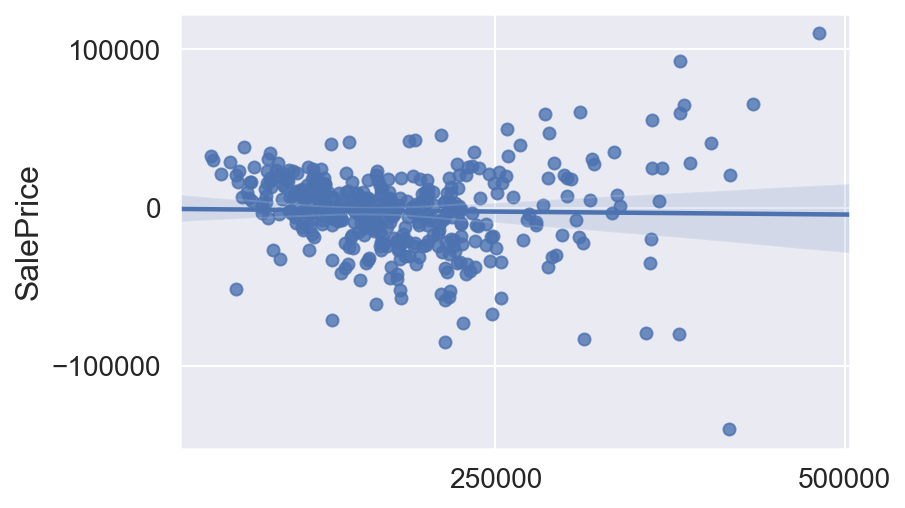

In [293]:
sns.regplot(y_pred_4,residuals_4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=18)
plt.ylabel('SalePrice', fontsize=16)
plt.savefig('./images/coef4.png')

In [294]:
rmse_4 = np.sqrt(mean_squared_error(y_test_4, y_pred_4))
rmse_4

25690.890129197694

# Kaggle Test

In [419]:
# Load Kaggle Dataset
kaggle_test = pd.read_csv("./datasets/test.csv", dtype={'MS SubClass': object, "PID": object, "Overall Qual": object, "Overall Cond": object})
kaggle_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [420]:
kaggle_test_cleaned = kaggle_test.drop(columns=['Misc Feature', 'Fence', 'Pool QC', 'Alley', 'Lot Frontage', "PID", 'Utilities', 'Land Slope', 'Electrical'])
kaggle_test_cleaned['Mas Vnr Type'].fillna("None", inplace=True)

In [421]:
def leave_null(data, columns):
    for i in columns:
        if i == "Lot Frontage":
            data[i] = data[i]
        elif data[i].dtypes == object:
            data[i].fillna("NA", inplace=True)
        else:
            data[i].fillna(0, inplace=True)

In [422]:
leave_null(kaggle_test, kaggle_test.columns)

In [423]:
# Function to rename Columns
def rename(x):
    if x == x.lower():
        return x
    else:
        try:
            x = x.replace(" ", "_").lower()
            return x
        except:
            return x

In [424]:
kaggle_test = kaggle_test.rename(columns = lambda x : rename(x))

In [425]:
dd = {'lot_shape' : {'IR3':0,'IR2':1,'IR1':2,'Reg':3},
           'overall_qual': {'1': 0,'2':1,'3':2,'4':3,"5":4,"6":5,'7':6,'8':7,'9':8,'10':9},
           'overall_cond': {'1': 0,'2':1,'3':2,'4':3,"5":4,"6":5,'7':6,'8':7,'9':8},
           'exter_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'exter_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'bsmt_exposure' : {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
           'bsmtfin_type_1' : {'NA':0,"Unf":1,'LwQ':2,'Rec':3,'BLQ':4,"ALQ":5,'GLQ':6},
           'bsmtfin_type_2' : {'NA':0,"Unf":1,'LwQ':2,'Rec':3,'BLQ':4,"ALQ":5,'GLQ':6},
           'functional' : {'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7},
           'garage_finish' : {'NA':0, 'Unf':1, 'RFn':2,'Fin':3},
           'garage_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'garage_cond' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'paved_drive' : {'N':0,'P':1,'Y':2},
           'heating_qc' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'kitchen_qual' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5},
           'fireplace_qu' : {'NA':0,"Po":1, 'Fa':2, 'TA': 3,'Gd': 4,"Ex":5}
           
}

In [426]:
kaggle_test.replace(dd, inplace=True)

In [427]:
kaggle_test_dum = pd.get_dummies(kaggle_test)

In [374]:
columns_exist = []
for c in X_train_final.columns:
    if c not in kaggle_test_dum.columns:
        print(c)
    else:
        columns_exist.append(c)
# # fit linear using training set
# model_lr = lr.fit(X_train,y_train)
# # training score
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# # testing score
# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

FTotal SF
Overall Qual
Total_Floor_SF
Kitchen Qual
Bsmt Qual
Garage Finish
Fireplace Qu
Heating QC
Bsmt Exposure
BsmtFin Type 1
Garage Qual
Neighborhood_GrnHill
Neighborhood_Landmrk
Condition 2_RRAe
Condition 2_RRAn
Condition 2_RRNn
Roof Matl_Membran
Heating_OthW
Heating_Wall


In [428]:
# Create Similar Columns with Kaggle Test Data
X_train_final = X_train_final.rename(columns = lambda x : rename(x))
kaggle_test_1 = kaggle_test_dum[X_train_final.columns]
kaggle_test_1.head()

KeyError: "['heating_othw', 'sale_type_oth', 'condition_1_norm', 'neighborhood_stonebr', 'sale_type_new', 'neighborhood_blueste', 'neighborhood_noridge', 'condition_2_posn', 'garage_type_detchd', 'neighborhood_nridght', 'neighborhood_idotrr', 'roof_matl_wdshngl', 'neighborhood_collgcr', 'neighborhood_sawyerw', 'heating_gasw', 'condition_1_rrnn', 'neighborhood_edwards', 'neighborhood_oldtown', 'neighborhood_names', 'heating_grav', 'condition_1_posa', 'garage_type_builtin', 'house_style_1story', 'neighborhood_timber', 'neighborhood_brdale', 'ms_zoning_rm', 'ms_zoning_rh', 'condition_1_posn', 'house_style_2.5unf', 'garage_type_2types', 'roof_matl_membran', 'condition_2_rrnn', 'house_style_2.5fin', 'garage_type_basment', 'neighborhood_mitchel', 'sale_type_con', 'heating_wall', 'ms_zoning_c_(all)', 'house_style_slvl', 'ms_zoning_rl', 'roof_matl_tar&grv', 'sale_type_conld', 'condition_2_posa', 'neighborhood_swisu', 'sale_type_wd_', 'total_floor_sf', 'condition_2_norm', 'house_style_1.5unf', 'neighborhood_meadowv', 'neighborhood_clearcr', 'ftotal_sf', 'street_pave', 'condition_1_feedr', 'ms_zoning_i_(all)', 'house_style_sfoyer', 'neighborhood_npkvill', 'neighborhood_crawfor', 'condition_2_rrae', 'neighborhood_brkside', 'neighborhood_sawyer', 'neighborhood_grnhill', 'sale_type_cwd', 'neighborhood_greens', 'garage_type_carport', 'sale_type_conlw', 'roof_matl_wdshake', 'condition_2_feedr', 'neighborhood_landmrk', 'neighborhood_nwames', 'neighborhood_somerst', 'ms_zoning_fv', 'neighborhood_veenker', 'condition_2_rran', 'sale_type_conli', 'condition_1_rrne', 'neighborhood_gilbert', 'condition_1_rran', 'garage_qual', 'condition_1_rrae'] not in index"

In [360]:
X_train_sc_1_fin = ss.fit_transform(X_train_final)
ridge.fit(X_train_sc_1_fin, y_train_final)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [362]:
kaggle_test_1 = ss.transform(X_train_final)

In [363]:
prediction_1 = kaggle_test[["Id"]]
# len(prediction_1.iloc[:])

In [364]:
prediction_1["SalePrice"] = pred_kaggle_1[:879]

In [365]:
prediction_1.set_index("Id")

SalePrice
Id                 
2658  140363.238711
2718  189408.221119
2414  108579.997671
1989  182754.976815
625   318244.092933
...             ...
1662  149438.656934
1234  125570.124811
1373   87662.848461
1672  213597.479767
1939  248514.307221

[879 rows x 1 columns]

In [366]:
# Save Dataset to CSV to submit to Kaggle
prediction_1.to_csv("./datasets/prediction_1.csv",index=False)

In [ ]:
# # keep the same missing dummy variable in Train and Test data
# # Find missing columns in test
# missing_cols = set(ames_train.columns) - set(kaggle_test.columns)
# # Add a missing column in test with default value equal to 0
# for c in missing_cols:
#     kaggle_test[c] = 0
# # Ensure the order of columns in test is the same as in train
# kaggle_test = kaggle_test[features_model]

In [379]:
kaggle_test_dum['Neighborhood_GrnHill'] = 0

In [385]:
columns_exist = []
for c in X_3.columns:
    if c not in kaggle_test_dum.columns:
        print(c)
    else:
        columns_exist.append(c)

kaggle_test_2 = kaggle_test_dum[columns_exist]
kaggle_test_2.shape

Total_Floor_SF
Garage Finish
Heating QC
Bsmt Exposure
BsmtFin Type 1
Paved Drive
SalePrice


(879, 18)

In [387]:
X_train_sc2 = ss.fit_transform(X_train_3)
ridge.fit(X_train_sc2, y_train_3)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [395]:
kaggle_test_2sc = ss.transform(X_train_3)

# Predict Kaggle SalePrice
pred_kaggle_2 = ridge.predict(kaggle_test_2sc)

In [403]:
# Create DataFrame with ID and SalePrice
prediction_2 = kaggle_test[["Id"]]
prediction_2["SalePrice"] = pred_kaggle_2[:879]
prediction_2.set_index('Id', inplace= True)
prediction_2.to_csv("./datasets/prediction_2.csv")

In [405]:
kaggle_test.dtypes

Id                   int64
PID                 object
MS SubClass         object
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual        object
Overall Cond        object
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [408]:
# Combine Overall Qual and Overall Cond
kaggle_test['Overalls'] = kaggle_test['Overall Qual'].astype('int64') * kaggle_test['Overall Cond'].astype('int64') 
kaggle_test['Externals'] = kaggle_test['Exter Qual'].astype('int64') * kaggle_test['Exter Cond'].astype('int64')
kaggle_test['Basements'] = kaggle_test['Bsmt Qual'].astype('int64') * kaggle_test['Bsmt Cond'].astype('int64') 
kaggle_test['Garage'] = kaggle_test['Garage Qual'].astype('int64') * kaggle_test['Garage Cond'].astype('int64') 
kaggle_test['Kitchen'] = kaggle_test['Kitchen Qual'].astype('int64') * kaggle_test['Kitchen AbvGr'].astype('int64')

ValueError: invalid literal for int() with base 10: 'TA'

# Model Selection

To interpret regression models, metrics used are:
1. R2-score
2. MSE/RMSE
3. Coefficients

Ridge and Lasso Regression can reduce the model complexity and prevent over-fitting as compared to the basic Linear Regression. Considering that there are constraints on the coefs, the optimisation function is penalised. The lambda is controlled in the Lasso Regression model. 

# Itertools -> Combinations 

In [ ]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
k = len(X.columns)
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over len(x.columns) features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

# Target Values Prediction

In [ ]:
# function
y_pred = model.predict(kaggle_test_sc)
y_pred.mean()

In [ ]:
y_pred.shape

In [ ]:
# create submission dataframe with predictions
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
submission['Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]

In [ ]:
submission.head()

In [ ]:
submission['SalePrice'].hist()

In [ ]:
# write predictions to csv
# submission.to_csv('submission_04', index=False)

In [ ]:
# RMSE (Public score based on only 30% of the test data): 29372.39816
# Final score (based on remaining 70% of the test data): ?

Through EDA, purchasing a house in a developing part of town - maybe the 4-6th top neighborhoods would be a good investiment due to the disparity in price between family homes in the top neighborhoods and the other row houses.